# Produces graphs like CMD, L functions etc.

In [65]:
%matplotlib inline
import math
import numpy as np
from astropy import stats
import pandas as pd
import glob, os
import nway
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from scipy.stats import gaussian_kde
from scipy.stats import halfnorm
from astropy.stats.histogram import knuth_bin_width
from scipy.optimize import curve_fit
from astropy import units as u
from astropy.io import ascii, fits
from astropy.table import join, hstack, Table, Column, vstack
from astropy.coordinates import Angle, Latitude, Longitude, SkyCoord

# Set colour palette & plot layouts
import seaborn as sns     #; sns.set()
sns.set_context("paper")   # "paper", "notebook", "talk", "poster"

# Catalogue Operations

In [3]:
# Read in the file with the good data
file = 'good_data.csv'
data = ascii.read(file, data_start=1)
#print(np.max(data['mag_36_1']))
#print(np.max(data['mag_36_3']))
#print(np.max(data['mag_36_4']))
#print(np.max(data['mag_45_1']))
#print(np.max(data['mag_45_3']))
#print(np.max(data['mag_45_4']))

# Set up columns for evolved and variable source flags
data['evolved_1']=0
data['evolved_3']=0
data['evolved_4']=0
data['variable_1_3']=0
data['variable_1_4']=0
data['variable_3_4']=0

In [4]:
good_E1_idx = np.where((data['mag_36_1']!=-99) & (data['mag_45_1']!=-99))
good_E3_idx = np.where((data['mag_36_3']!=-99) & (data['mag_45_3']!=-99))
good_E4_idx = np.where((data['mag_36_4']!=-99) & (data['mag_45_4']!=-99))
print(len(good_E1_idx[0]))
print(len(good_E3_idx[0]))
print(len(good_E4_idx[0]))

# Use colour cutoffs on CMD of -1.6 to 1.5
bright_blue_1_idx = np.where((data['mag_36_1']-data['mag_45_1'] < -1.6) &(data['mag_36_1']!=-99)&(data['mag_45_1']!=-99))
faint_red_1_idx = np.where((data['mag_36_1']-data['mag_45_1'] > 1.5) & (data['mag_36_1']!=-99)&(data['mag_45_1']!=-99))
bright_blue_3_idx = np.where((data['mag_36_3']-data['mag_45_3'] < -1.6) & (data['mag_36_3']!=-99)&(data['mag_45_3']!=-99))
faint_red_3_idx = np.where((data['mag_36_3']-data['mag_45_3'] > 1.5) & (data['mag_36_3']!=-99)&(data['mag_45_3']!=-99))
bright_blue_4_idx = np.where((data['mag_36_4']-data['mag_45_4'] < -1.6) & (data['mag_36_4']!=-99)&(data['mag_45_4']!=-99))
faint_red_4_idx = np.where((data['mag_36_4']-data['mag_45_4'] > 1.5) & (data['mag_36_4']!=-99)&(data['mag_45_4']!=-99))
print("bright blue 1:",len(bright_blue_1_idx[0]))
print("faint red 1:",len(faint_red_1_idx[0]))
print("bright blue 3:",len(bright_blue_3_idx[0]))
print("faint red 3:",len(faint_red_3_idx[0]))
print("bright blue 4:",len(bright_blue_4_idx[0]))
print("faint red 4:",len(faint_red_4_idx[0]))

1017
721
746
bright blue 1: 0
faint red 1: 0
bright blue 3: 0
faint red 3: 1
bright blue 4: 0
faint red 4: 0


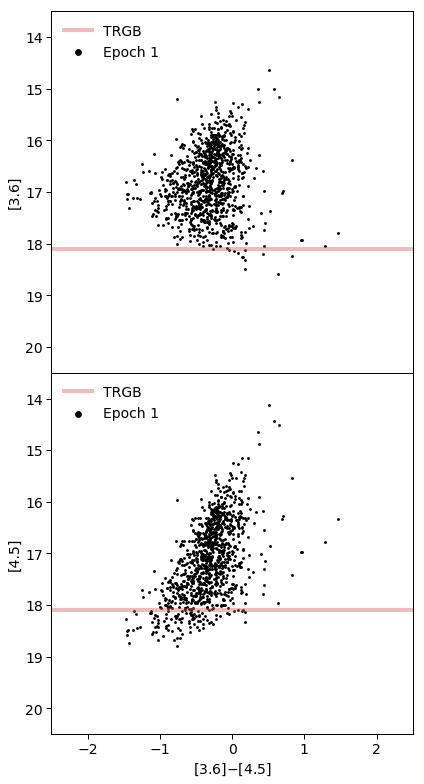

In [8]:
# CMDs
plt.rc('font', family='sans-serif')
plt.rc("xtick", labelsize=14)
plt.rc("ytick", labelsize=14)
plt.rc("axes", labelsize=14)
plt.rc("legend", fontsize=14)
plt.figure(figsize=(6,11))

plt.subplot(2,1,1)
# Plot all sensible stars
plt.scatter(data['mag_36_1'][good_E1_idx]-data['mag_45_1'][good_E1_idx], data['mag_36_1'][good_E1_idx], s=3.9,color=sns.xkcd_rgb['black'], label="Epoch 1")
# Overplot variable sources
#plt.scatter(data['mag_36_1'][bad_mag_error_idx_36_1a]-data['mag_45_1'][bad_mag_error_idx_36_1a], data['mag_36_1'][bad_mag_error_idx_36_1a],s=19,color=sns.xkcd_rgb['blue'],label="bad [3.6] error")
#plt.scatter(data['mag_36_1'][bad_mag_error_idx_45_1a]-data['mag_45_1'][bad_mag_error_idx_45_1a], data['mag_36_1'][bad_mag_error_idx_45_1a],s=19,color=sns.xkcd_rgb['red'],label="bad [4.5] error")
#plt.xlabel("[3.6]$-$[4.5]", fontsize=14)
plt.ylabel("[3.6]", fontsize=14)
plt.xlim(-2.5,2.5)
plt.ylim(20.5,13.5)
#Add TRGB
plt.axhline(y=-6.3+24.4, color=sns.xkcd_rgb["pale red"], linestyle='-', alpha=0.4, linewidth=4,label='TRGB')
#plt.axvline(x=1.5)
#plt.axvline(x=-1.6)
plt.legend(loc="upper left",frameon=False, scatterpoints=1, numpoints=1, markerscale=3.)
#plt.title('M32 E1', fontsize=18)
#plt.savefig("bla.pdf", bbox_inches='tight')    # Saves the figure is uncommented
#plt.tight_layout()
#plt.show()
#plt.close()


# Repeat for 4.5 on the y-axis
plt.subplot(2,1,2)
#plt.rc('font', family='sans-serif')
#plt.rc("xtick", labelsize=14)
#plt.rc("ytick", labelsize=14)
#plt.rc("axes", labelsize=14)
#plt.rc("legend", fontsize=14)
#plt.figure(figsize=(6,6))
# Plot all sensible stars
plt.scatter(data['mag_36_1'][good_E1_idx]-data['mag_45_1'][good_E1_idx], data['mag_45_1'][good_E1_idx], s=3.9,color=sns.xkcd_rgb['black'], label="Epoch 1")
# Overplot variable sources
#plt.scatter(data['mag_36_1'][bad_mag_error_idx_36_1a]-data['mag_45_1'][bad_mag_error_idx_36_1a], data['mag_45_1'][bad_mag_error_idx_36_1a],s=19,color=sns.xkcd_rgb['blue'],label="bad [3.6] error")
#plt.scatter(data['mag_36_1'][bad_mag_error_idx_45_1a]-data['mag_45_1'][bad_mag_error_idx_45_1a], data['mag_45_1'][bad_mag_error_idx_45_1a],s=19,color=sns.xkcd_rgb['red'],label="bad [4.5] error")
plt.xlabel("[3.6]$-$[4.5]", fontsize=14)
plt.ylabel("[4.5]", fontsize=14)
plt.xlim(-2.5,2.5)
plt.ylim(20.5,13.5)
#plt.axvline(x=1.5)
#plt.axvline(x=-1.6)
#Add TRGB
plt.axhline(y=-6.3+24.4, color=sns.xkcd_rgb["pale red"], linestyle='-', alpha=0.4, linewidth=4,label='TRGB')
plt.legend(loc="upper left",frameon=False, scatterpoints=1, numpoints=1, markerscale=3.)
#plt.title('M32 E1', fontsize=18)
#plt.savefig("bla.pdf", bbox_inches='tight')    # Saves the figure is uncommented
plt.tight_layout()
plt.subplots_adjust(hspace=0)
plt.show()
plt.close()

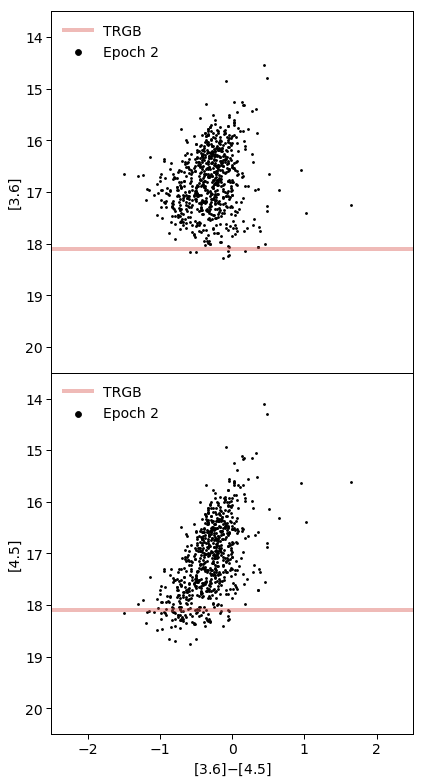

In [7]:
plt.rc('font', family='sans-serif')
plt.rc("xtick", labelsize=14)
plt.rc("ytick", labelsize=14)
plt.rc("axes", labelsize=14)
plt.rc("legend", fontsize=14)
plt.figure(figsize=(6,11))

plt.subplot(2,1,1)
# Plot all sensible stars
plt.scatter(data['mag_36_3'][good_E3_idx]-data['mag_45_3'][good_E3_idx], data['mag_36_3'][good_E3_idx], s=3.9,color=sns.xkcd_rgb['black'], label="Epoch 2")
# Overplot variable sources
#plt.scatter(data['mag_36_3'][bad_mag_error_idx_36_3a]-data['mag_45_3'][bad_mag_error_idx_36_3a], data['mag_36_3'][bad_mag_error_idx_36_3a],s=19,color=sns.xkcd_rgb['blue'],label="bad [3.6] error")
#plt.scatter(data['mag_36_3'][bad_mag_error_idx_45_3a]-data['mag_45_3'][bad_mag_error_idx_45_3a], data['mag_36_3'][bad_mag_error_idx_45_3a],s=19,color=sns.xkcd_rgb['red'],label="bad [4.5] error")
#plt.xlabel("[3.6]$-$[4.5]", fontsize=14)
plt.ylabel("[3.6]", fontsize=14)
plt.xlim(-2.5,2.5)
plt.ylim(20.5,13.5)
#Add TRGB
plt.axhline(y=-6.3+24.4, color=sns.xkcd_rgb["pale red"], linestyle='-', alpha=0.4, linewidth=4,label='TRGB')
#plt.axvline(x=1.5)
#plt.axvline(x=-1.6)
plt.legend(loc="upper left",frameon=False, scatterpoints=1, numpoints=1, markerscale=3.)
#plt.title('M32 E3', fontsize=18)
#plt.savefig("bla.pdf", bbox_inches='tight')    # Saves the figure is uncommented
#plt.tight_layout()
#plt.show()
#plt.close()


# Repeat for 4.5 on the y-axis
plt.subplot(2,1,2)
#plt.rc('font', family='sans-serif')
#plt.rc("xtick", labelsize=14)
#plt.rc("ytick", labelsize=14)
#plt.rc("axes", labelsize=14)
#plt.rc("legend", fontsize=14)
#plt.figure(figsize=(6,6))
# Plot all sensible stars
plt.scatter(data['mag_36_3'][good_E3_idx]-data['mag_45_3'][good_E3_idx], data['mag_45_3'][good_E3_idx], s=3.9,color=sns.xkcd_rgb['black'], label="Epoch 2")
# Overplot variable sources
#plt.scatter(data['mag_36_3'][bad_mag_error_idx_36_3a]-data['mag_45_3'][bad_mag_error_idx_36_3a], data['mag_45_3'][bad_mag_error_idx_36_3a],s=19,color=sns.xkcd_rgb['blue'],label="bad [3.6] error")
#plt.scatter(data['mag_36_3'][bad_mag_error_idx_45_3a]-data['mag_45_3'][bad_mag_error_idx_45_3a], data['mag_45_3'][bad_mag_error_idx_45_3a],s=19,color=sns.xkcd_rgb['red'],label="bad [4.5] error")
plt.xlabel("[3.6]$-$[4.5]", fontsize=14)
plt.ylabel("[4.5]", fontsize=14)
plt.xlim(-2.5,2.5)
plt.ylim(20.5,13.5)
#plt.axvline(x=1.5)
#plt.axvline(x=-1.6)
#Add TRGB
plt.axhline(y=-6.3+24.4, color=sns.xkcd_rgb["pale red"], linestyle='-', alpha=0.4, linewidth=4,label='TRGB')
plt.legend(loc="upper left",frameon=False, scatterpoints=1, numpoints=1, markerscale=3.)
#plt.title('M32 E3', fontsize=18)
#plt.savefig("bla.pdf", bbox_inches='tight')    # Saves the figure is uncommented
plt.tight_layout()
plt.subplots_adjust(hspace=0)
plt.show()
plt.close()

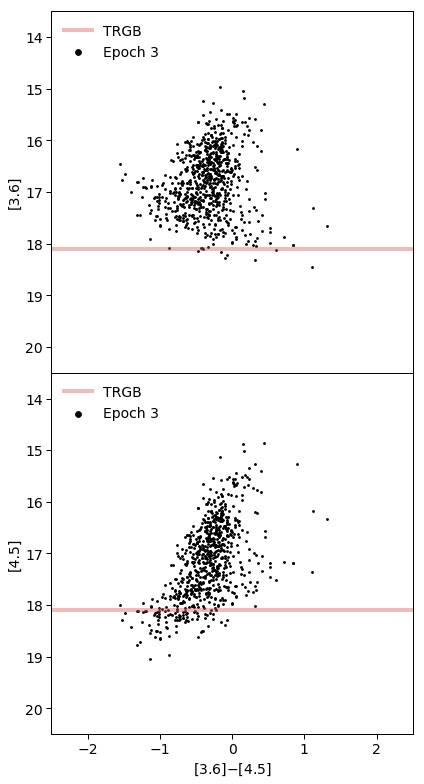

In [6]:
plt.rc('font', family='sans-serif')
plt.rc("xtick", labelsize=14)
plt.rc("ytick", labelsize=14)
plt.rc("axes", labelsize=14)
plt.rc("legend", fontsize=14)
plt.figure(figsize=(6,11))

plt.subplot(2,1,1)
# Plot all sensible stars
plt.scatter(data['mag_36_4'][good_E4_idx]-data['mag_45_4'][good_E4_idx], data['mag_36_4'][good_E4_idx], s=3.9,color=sns.xkcd_rgb['black'], label="Epoch 3")
# Overplot variable sources
#plt.scatter(data['mag_36_4'][bad_mag_error_idx_36_4a]-data['mag_45_4'][bad_mag_error_idx_36_4a], data['mag_36_4'][bad_mag_error_idx_36_4a],s=19,color=sns.xkcd_rgb['blue'],label="bad [3.6] error")
#plt.scatter(data['mag_36_4'][bad_mag_error_idx_45_4a]-data['mag_45_4'][bad_mag_error_idx_45_4a], data['mag_36_4'][bad_mag_error_idx_45_4a],s=19,color=sns.xkcd_rgb['red'],label="bad [4.5] error")
#plt.xlabel("[3.6]$-$[4.5]", fontsize=14)
plt.ylabel("[3.6]", fontsize=14)
plt.xlim(-2.5,2.5)
plt.ylim(20.5,13.5)
#Add TRGB
plt.axhline(y=-6.3+24.4, color=sns.xkcd_rgb["pale red"], linestyle='-', alpha=0.4, linewidth=4,label='TRGB')
#plt.axvline(x=1.5)
#plt.axvline(x=-1.6)
plt.legend(loc="upper left",frameon=False, scatterpoints=1, numpoints=1, markerscale=3.)
#plt.title('M32 E3', fontsize=18)
#plt.savefig("bla.pdf", bbox_inches='tight')    # Saves the figure is uncommented
#plt.tight_layout()
#plt.show()
#plt.close()


# Repeat for 4.5 on the y-axis
plt.subplot(2,1,2)
#plt.rc('font', family='sans-serif')
#plt.rc("xtick", labelsize=14)
#plt.rc("ytick", labelsize=14)
#plt.rc("axes", labelsize=14)
#plt.rc("legend", fontsize=14)
#plt.figure(figsize=(6,6))
# Plot all sensible stars
plt.scatter(data['mag_36_4'][good_E4_idx]-data['mag_45_4'][good_E4_idx], data['mag_45_4'][good_E4_idx], s=3.9,color=sns.xkcd_rgb['black'], label="Epoch 3")
# Overplot variable sources
#plt.scatter(data['mag_36_4'][bad_mag_error_idx_36_4a]-data['mag_45_4'][bad_mag_error_idx_36_4a], data['mag_45_4'][bad_mag_error_idx_36_4a],s=19,color=sns.xkcd_rgb['blue'],label="bad [3.6] error")
#plt.scatter(data['mag_36_4'][bad_mag_error_idx_45_4a]-data['mag_45_4'][bad_mag_error_idx_45_4a], data['mag_45_4'][bad_mag_error_idx_45_4a],s=19,color=sns.xkcd_rgb['red'],label="bad [4.5] error")
plt.xlabel("[3.6]$-$[4.5]", fontsize=14)
plt.ylabel("[4.5]", fontsize=14)
plt.xlim(-2.5,2.5)
plt.ylim(20.5,13.5)
#plt.axvline(x=1.5)
#plt.axvline(x=-1.6)
#Add TRGB
plt.axhline(y=-6.3+24.4, color=sns.xkcd_rgb["pale red"], linestyle='-', alpha=0.4, linewidth=4,label='TRGB')
plt.legend(loc="upper left",frameon=False, scatterpoints=1, numpoints=1, markerscale=3.)
#plt.title('M32 E3', fontsize=18)
#plt.savefig("bla.pdf", bbox_inches='tight')    # Saves the figure is uncommented
plt.tight_layout()
plt.subplots_adjust(hspace=0)
plt.show()
plt.close()

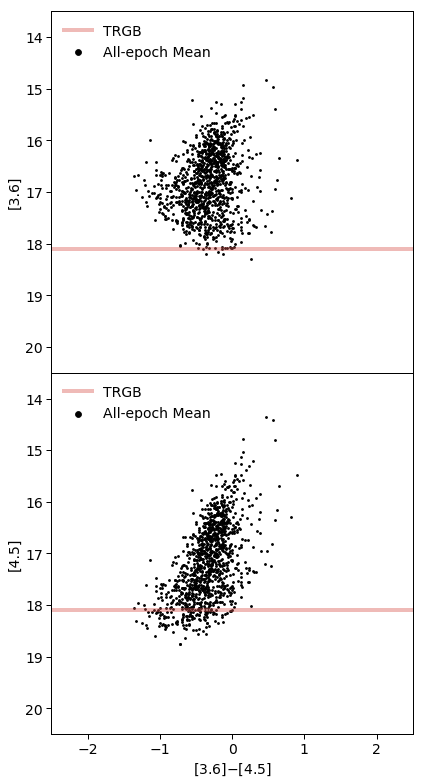

In [5]:
# Mean

plt.rc('font', family='sans-serif')
plt.rc("xtick", labelsize=14)
plt.rc("ytick", labelsize=14)
plt.rc("axes", labelsize=14)
plt.rc("legend", fontsize=14)
plt.figure(figsize=(6,11))

plt.subplot(2,1,1)
# Plot all sensible stars
plt.scatter(data['mean_mag_36']-data['mean_mag_45'], data['mean_mag_36'], s=3.9,color=sns.xkcd_rgb['black'], label="All-epoch Mean")
# Overplot variable sources
#plt.scatter(data['mean_mag_36_4'][bad_mean_mag_error_idx_36_4a]-data['mean_mag_45_4'][bad_mean_mag_error_idx_36_4a], data['mean_mag_36_4'][bad_mean_mag_error_idx_36_4a],s=19,color=sns.xkcd_rgb['blue'],label="bad [3.6] error")
#plt.scatter(data['mean_mag_36_4'][bad_mean_mag_error_idx_45_4a]-data['mean_mag_45_4'][bad_mean_mag_error_idx_45_4a], data['mean_mag_36_4'][bad_mean_mag_error_idx_45_4a],s=19,color=sns.xkcd_rgb['red'],label="bad [4.5] error")
#plt.xlabel("[3.6]$-$[4.5]", fontsize=14)
plt.ylabel("[3.6]", fontsize=14)
plt.xlim(-2.5,2.5)
plt.ylim(20.5,13.5)
#Add TRGB
plt.axhline(y=-6.3+24.4, color=sns.xkcd_rgb["pale red"], linestyle='-', alpha=0.4, linewidth=4,label='TRGB')
#plt.axvline(x=1.5)
#plt.axvline(x=-1.6)
plt.legend(loc="upper left",frameon=False, scatterpoints=1, numpoints=1, markerscale=3.)
#plt.title('M32 E3', fontsize=18)
#plt.savefig("bla.pdf", bbox_inches='tight')    # Saves the figure is uncommented
#plt.tight_layout()
#plt.show()
#plt.close()


# Repeat for 4.5 on the y-axis
plt.subplot(2,1,2)
#plt.rc('font', family='sans-serif')
#plt.rc("xtick", labelsize=14)
#plt.rc("ytick", labelsize=14)
#plt.rc("axes", labelsize=14)
#plt.rc("legend", fontsize=14)
#plt.figure(figsize=(6,6))
# Plot all sensible stars
plt.scatter(data['mean_mag_36']-data['mean_mag_45'], data['mean_mag_45'], s=3.9,color=sns.xkcd_rgb['black'], label="All-epoch Mean")
# Overplot variable sources
#plt.scatter(data['mean_mag_36_4'][bad_mean_mag_error_idx_36_4a]-data['mean_mag_45_4'][bad_mean_mag_error_idx_36_4a], data['mean_mag_45_4'][bad_mean_mag_error_idx_36_4a],s=19,color=sns.xkcd_rgb['blue'],label="bad [3.6] error")
#plt.scatter(data['mean_mag_36_4'][bad_mean_mag_error_idx_45_4a]-data['mean_mag_45_4'][bad_mean_mag_error_idx_45_4a], data['mean_mag_45_4'][bad_mean_mag_error_idx_45_4a],s=19,color=sns.xkcd_rgb['red'],label="bad [4.5] error")
plt.xlabel("[3.6]$-$[4.5]", fontsize=14)
plt.ylabel("[4.5]", fontsize=14)
plt.xlim(-2.5,2.5)
plt.ylim(20.5,13.5)
#plt.axvline(x=1.5)
#plt.axvline(x=-1.6)
#Add TRGB
plt.axhline(y=-6.3+24.4, color=sns.xkcd_rgb["pale red"], linestyle='-', alpha=0.4, linewidth=4,label='TRGB')
plt.legend(loc="upper left",frameon=False, scatterpoints=1, numpoints=1, markerscale=3.)
#plt.title('M32 E3', fontsize=18)
#plt.savefig("bla.pdf", bbox_inches='tight')    # Saves the figure is uncommented
plt.tight_layout()
plt.subplots_adjust(hspace=0)
plt.show()
plt.close()

# Variability

Abs stats:
1.0330678746
1.1871055371904444

Value stats:
0.021885980631901832
1.57352146277404


Text(0.5, 1.0, 'E3-E4')

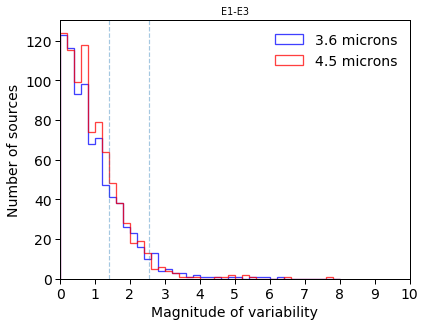

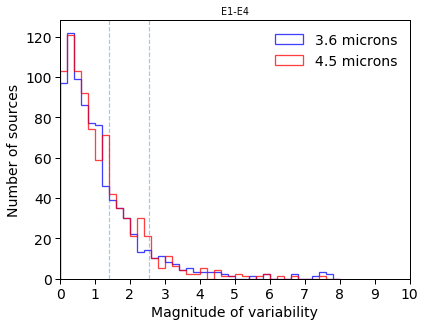

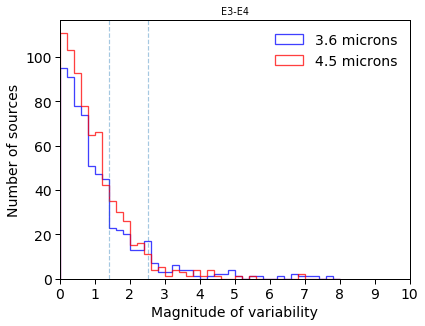

In [68]:
# Plot 3 histograms (Each filter and baseline) of variability
# On a single graph show the 36 and 45 variability histograms overplotted

# Find where the V values are good separately in each filter
good_var_1_3_idx_36 = np.where((data['var_36_1_3_abs']!=-99))
good_var_1_3_idx_45 = np.where((data['var_45_1_3_abs']!=-99))
good_var_1_4_idx_36 = np.where((data['var_36_1_4_abs']!=-99))
good_var_1_4_idx_45 = np.where((data['var_45_1_4_abs']!=-99))
good_var_3_4_idx_36 = np.where((data['var_36_3_4_abs']!=-99))
good_var_3_4_idx_45 = np.where((data['var_45_3_4_abs']!=-99))

plt.rc('font', family='sans-serif')
plt.rc("xtick", labelsize=14)
plt.rc("ytick", labelsize=14)
plt.rc("axes", labelsize=14)
plt.rc("legend", fontsize=14)

mean_36_1_3 = np.mean(data['var_36_1_3_abs'][good_var_1_3_idx_36])
std_36_1_3 = np.std(data['var_36_1_3_abs'][good_var_1_3_idx_36])
print("Abs stats:")
print(mean_36_1_3)
print(std_36_1_3)

mean_36_1_3 = np.mean(data['var_36_1_3'][np.where(data['var_36_1_3']!=-99)])
std_36_1_3 = np.std(data['var_36_1_3'][np.where(data['var_36_1_3']!=-99)])
print("\nValue stats:")
print(mean_36_1_3)
print(std_36_1_3)



ig = plt.figure(figsize=(6,4.5))
bins = np.linspace(0, 8, 41)  # Bin start, end, number +1
ax = sns.distplot(data['var_36_1_3_abs'][good_var_1_3_idx_36] ,kde=False, bins=bins,
                 hist_kws={"histtype": "step", "linewidth": 1.3, "label": "3.6 microns", "alpha":0.75,"color": "b"})
ax = sns.distplot(data['var_45_1_3_abs'][good_var_1_3_idx_45] ,kde=False, bins=bins,
                 hist_kws={"histtype": "step", "linewidth": 1.3, "label": "4.5 microns", "alpha":0.75,"color": "r"})
ax.legend(loc=0, frameon=False, scatterpoints=1, numpoints=1, markerscale=9.)
ax.set_xlabel('Magnitude of variability')
ax.set_ylabel('Number of sources')
ax.set_xlim(0,8)
ax.set_xticks(np.arange(11)) #Must add 1 to desired last tick
plt.tight_layout()
#plt.axvline(x=0.75,linestyle='--',alpha=0.4)
plt.axvline(x=1.4,linestyle='--',alpha=0.4)
plt.axvline(x=2.533,linestyle='--',alpha=0.4)

plt.title("E1-E3")

ig = plt.figure(figsize=(6,4.5))
bins = np.linspace(0, 8, 41)  # Bin start, end, number +1
ax = sns.distplot(data['var_36_1_4_abs'][good_var_1_4_idx_36] ,kde=False, bins=bins,
                 hist_kws={"histtype": "step", "linewidth": 1.3, "label": "3.6 microns", "alpha":0.75,"color": "b"})
ax = sns.distplot(data['var_45_1_4_abs'][good_var_1_4_idx_45] ,kde=False, bins=bins,
                 hist_kws={"histtype": "step", "linewidth": 1.3, "label": "4.5 microns", "alpha":0.75,"color": "r"})
ax.legend(loc=0, frameon=False, scatterpoints=1, numpoints=1, markerscale=9.)
ax.set_xlabel('Magnitude of variability')
ax.set_ylabel('Number of sources')
ax.set_xlim(0,8)
ax.set_xticks(np.arange(11)) #Must add 1 to desired last tick
plt.tight_layout()
#plt.axvline(x=0.75,linestyle='--',alpha=0.4)
plt.axvline(x=1.4,linestyle='--',alpha=0.4)
plt.axvline(x=2.533,linestyle='--',alpha=0.4)
plt.title("E1-E4")

ig = plt.figure(figsize=(6,4.5))
bins = np.linspace(0, 8, 41)  # Bin start, end, number +1
ax = sns.distplot(data['var_36_3_4_abs'][good_var_3_4_idx_36] ,kde=False, bins=bins,
                 hist_kws={"histtype": "step", "linewidth": 1.3, "label": "3.6 microns", "alpha":0.75,"color": "b"})
ax = sns.distplot(data['var_45_3_4_abs'][good_var_3_4_idx_45] ,kde=False, bins=bins,
                 hist_kws={"histtype": "step", "linewidth": 1.3, "label": "4.5 microns", "alpha":0.75,"color": "r"})
ax.legend(loc=0, frameon=False, scatterpoints=1, numpoints=1, markerscale=9.)
ax.set_xlabel('Magnitude of variability')
ax.set_ylabel('Number of sources')
ax.set_xlim(0,8)
ax.set_xticks(np.arange(11)) #Must add 1 to desired last tick
plt.tight_layout()
#plt.axvline(x=0.75,linestyle='--',alpha=0.4)
plt.axvline(x=1.4,linestyle='--',alpha=0.4)
plt.axvline(x=2.533,linestyle='--',alpha=0.4)
plt.title("E3-E4")

In [13]:
# Create a gaussian function
def gaussian(x, a, b, c):
    val = a * np.exp(-(x - b)**2 / c**2)
    return val

Sigma =  1.739 +/- 0.004
Sigma =  3.355 +/- 0.004
Sigma =  1.848 +/- 0.007
Sigma =  1.700 +/- 0.002
Sigma =  1.937 +/- 0.005
Sigma =  1.732 +/- 0.005


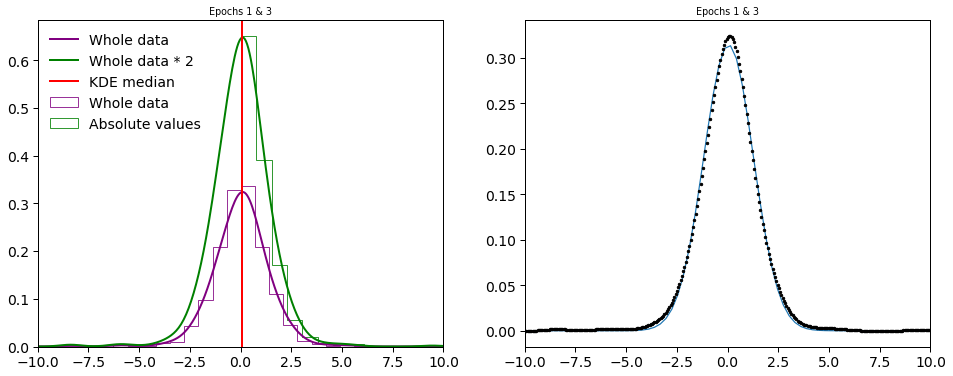

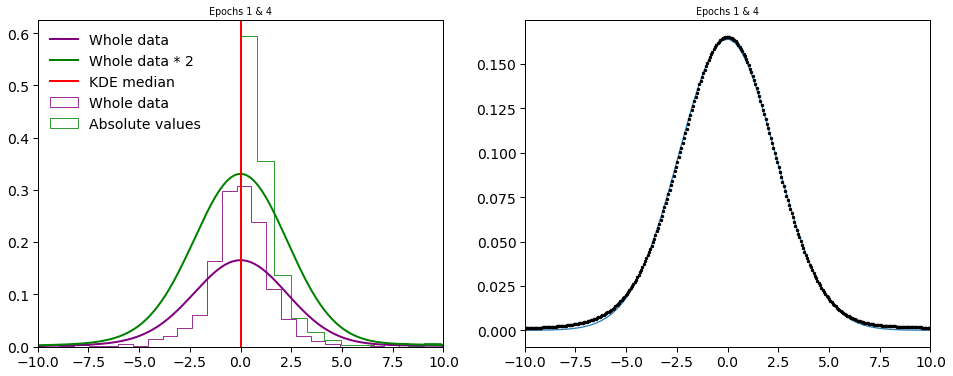

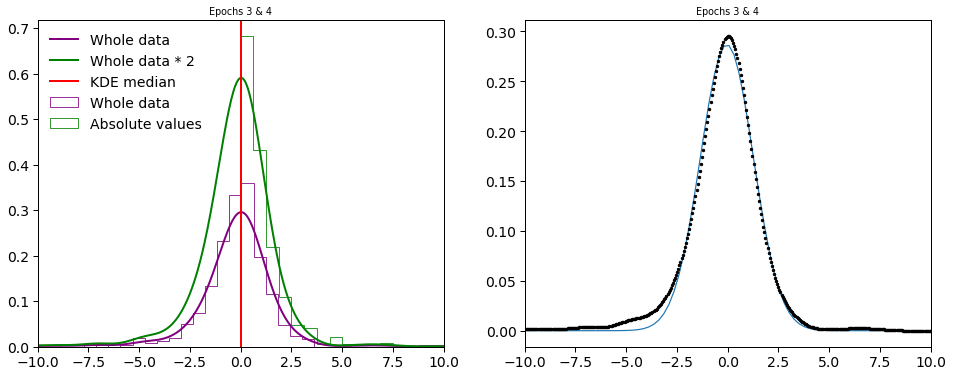

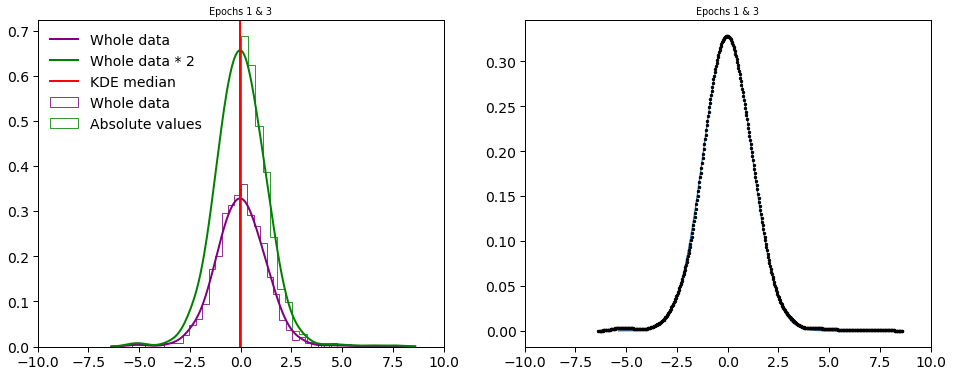

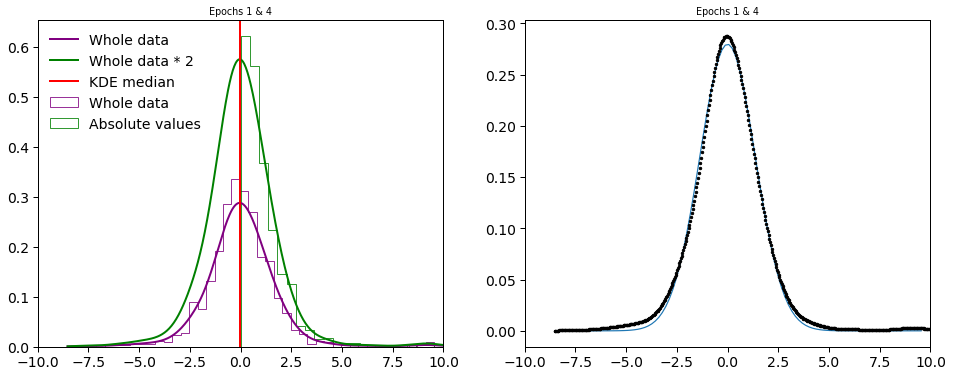

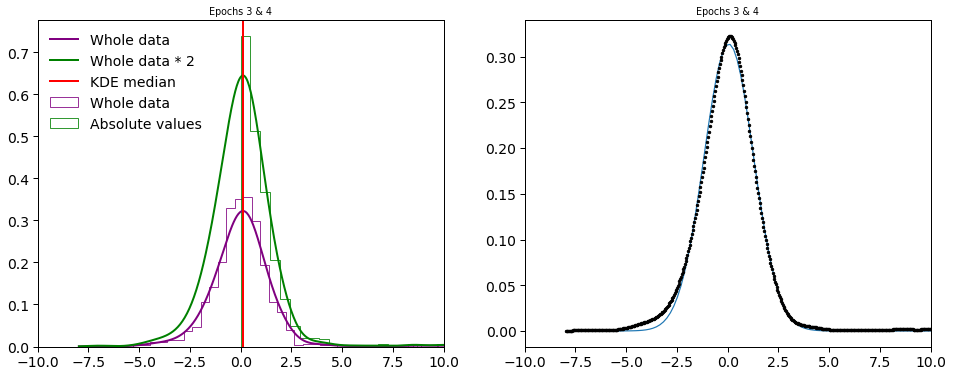

In [14]:
def sigma(col,col_abs,epochs):
    # Approximate as Gaussian centred on 0
    kde_data = data[col][np.where(data[col]!=-99)]
    # Compute optimum bin width using Knuth's Algorithm
    binwidth = (stats.knuth_bin_width(kde_data))
    bin_number = (max(kde_data)+binwidth)/binwidth
    bins = np.arange(min(kde_data), max(kde_data) + binwidth, binwidth)
    x_eval = np.linspace(kde_data.min() - 1.0, kde_data.max() + 1.0, 500)
    kde = gaussian_kde(kde_data,bw_method=binwidth)

    plt.figure(figsize=(16,6))
    plt.rc('font', family='sans-serif')
    plt.rc("xtick", labelsize=14)
    plt.rc("ytick", labelsize=14)
    plt.rc("axes", labelsize=14)
    plt.rc("legend", fontsize=14)
    
    plt.subplot(1,2,1)
    plt.plot(x_eval, kde(x_eval),'k',lw=2,label='Whole data',color='purple')
    plt.plot(x_eval, 2*kde(x_eval),'k',lw=2,label='Whole data * 2',color='green')

    plt.hist(data[col][np.where(data[col]!=-99)],bins=41,density=True,label='Whole data',color='purple',
             histtype='step')
    plt.hist(data[col_abs][np.where(data[col_abs]!=-99)],bins=21,density=True,label='Absolute values',color='green',
             histtype='step')

    plt.legend(loc=0, frameon=False, scatterpoints=1, numpoints=1, markerscale=9.)

    # Find the Round value for the peak of the distibution
    max_idx = np.where(kde(x_eval) == max(kde(x_eval)))
    #print("Round =  %.2f" % (x_eval[max_idx]))
    plt.axvline(x=np.nanmedian(x_eval[max_idx]), linewidth=2, color='r',label='KDE median')
    plt.xlim(-10,10)
    plt.legend(loc=0, frameon=False, scatterpoints=1, numpoints=1, markerscale=9.)
    plt.title("Epochs "+epochs)


    plt.subplot(1,2,2)
    # Fit a gaussian to the data
    e = np.random.uniform(0.001, 0.001, len(x_eval))  # Give the data an error value
    #e = np.sqrt(kde(x_eval))   # Give the data an error value this is correct for a histogram not a probability
    # Fit the gaussian to the data
    popt, pcov = curve_fit(gaussian, x_eval, kde(x_eval), sigma=e)
    # Print results of fitting the gausian to the model
    #print("Scale =  %.3f +/- %.3f" % (popt[0], np.sqrt(pcov[0, 0])))
    #print("Offset = %.3f +/- %.3f" % (popt[1], np.sqrt(pcov[1, 1])))
    print("Sigma =  %.3f +/- %.3f" % (popt[2], np.sqrt(pcov[2, 2])))

    #Plot the data and the gausian model fit to the data 
    # Plot data with random error
    plt.errorbar(x_eval, kde(x_eval), yerr=e, linewidth=0.1, color='black', fmt='.')
    # Plot model
    xm = np.linspace(min(kde_data), max(kde_data), 100)  # 100 evenly spaced points
    plt.plot(xm, gaussian(xm, popt[0], popt[1], popt[2]))
    plt.xlim(-10,10)
    plt.title("Epochs "+epochs)
    

sigma('var_36_1_3','var_36_1_3_abs','1 & 3')
sigma('var_36_1_4','var_36_1_4_abs','1 & 4')
sigma('var_36_3_4','var_36_3_4_abs','3 & 4')
sigma('var_45_1_3','var_45_1_3_abs','1 & 3')
sigma('var_45_1_4','var_45_1_4_abs','1 & 4')
sigma('var_45_3_4','var_45_3_4_abs','3 & 4')

Sigma =  3.355 +/- 0.004


Text(0.5, 1.0, '[3.6] E1-E4')

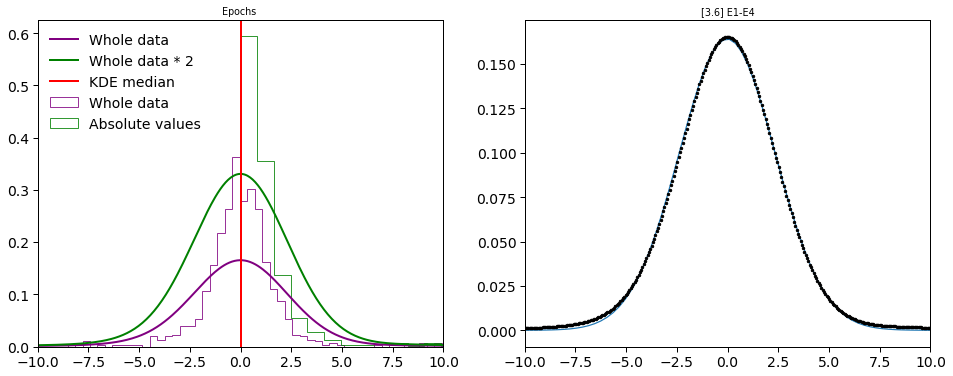

In [15]:
# Approximate as Gaussian centred on 0
kde_data = data['var_36_1_4'][np.where(data['var_36_1_4']!=-99)]
# Compute optimum bin width using Knuth's Algorithm
binwidth = (stats.knuth_bin_width(kde_data))
bin_number = (max(kde_data)+binwidth)/binwidth
bins = np.arange(min(kde_data), max(kde_data) + binwidth, binwidth)
x_eval = np.linspace(kde_data.min() - 1.0, kde_data.max() + 1.0, 500)
kde = gaussian_kde(kde_data,bw_method=binwidth)

plt.figure(figsize=(16,6))
plt.rc('font', family='sans-serif')
plt.rc("xtick", labelsize=14)
plt.rc("ytick", labelsize=14)
plt.rc("axes", labelsize=14)
plt.rc("legend", fontsize=14)

plt.subplot(1,2,1)
plt.plot(x_eval, kde(x_eval),'k',lw=2,label='Whole data',color='purple')
plt.plot(x_eval, 2*kde(x_eval),'k',lw=2,label='Whole data * 2',color='green')

plt.hist(data['var_36_1_4'][np.where(data['var_36_1_4']!=-99)],bins=81,density=True,label='Whole data',color='purple',
         histtype='step')
plt.hist(data['var_36_1_4_abs'][np.where(data['var_36_1_4_abs']!=-99)],bins=21,density=True,label='Absolute values',color='green',
         histtype='step')

plt.legend(loc=0, frameon=False, scatterpoints=1, numpoints=1, markerscale=9.)

# Find the Round value for the peak of the distibution
max_idx = np.where(kde(x_eval) == max(kde(x_eval)))
#print("Round =  %.2f" % (x_eval[max_idx]))
plt.axvline(x=np.nanmedian(x_eval[max_idx]), linewidth=2, color='r',label='KDE median')
plt.xlim(-10,10)
plt.legend(loc=0, frameon=False, scatterpoints=1, numpoints=1, markerscale=9.)
plt.title("Epochs ")


plt.subplot(1,2,2)
# Fit a gaussian to the data
e = np.random.uniform(0.001, 0.001, len(x_eval))  # Give the data an error value
#e = np.sqrt(kde(x_eval))   # Give the data an error value this is correct for a histogram not a probability
# Fit the gaussian to the data
popt, pcov = curve_fit(gaussian, x_eval, kde(x_eval), sigma=e)
# Print results of fitting the gausian to the model
#print("Scale =  %.3f +/- %.3f" % (popt[0], np.sqrt(pcov[0, 0])))
#print("Offset = %.3f +/- %.3f" % (popt[1], np.sqrt(pcov[1, 1])))
print("Sigma =  %.3f +/- %.3f" % (popt[2], np.sqrt(pcov[2, 2])))

#Plot the data and the gausian model fit to the data 
# Plot data with random error
plt.errorbar(x_eval, kde(x_eval), yerr=e, linewidth=0.1, color='black', fmt='.')
# Plot model
xm = np.linspace(min(kde_data), max(kde_data), 100)  # 100 evenly spaced points
plt.plot(xm, gaussian(xm, popt[0], popt[1], popt[2]))
plt.xlim(-10,10)
plt.title("[3.6] E1-E4")

# Probability-selected variable stars

In [55]:
# Set evolved star region

x=0.1 # value from paper
y=16.444 # absolute mag of -8, use mean distance modulus of M32 from A census of orbital properties of the M31 satellites
#Laura L. Watkins, N. Wyn Evans and Glenn van de Ven page 13

# Set sigma
sig = 1.7912

No. variable in E1-E3:  28
No. variable in E1-E4:  66
No. variable in E3-E4:  43
12
26
17


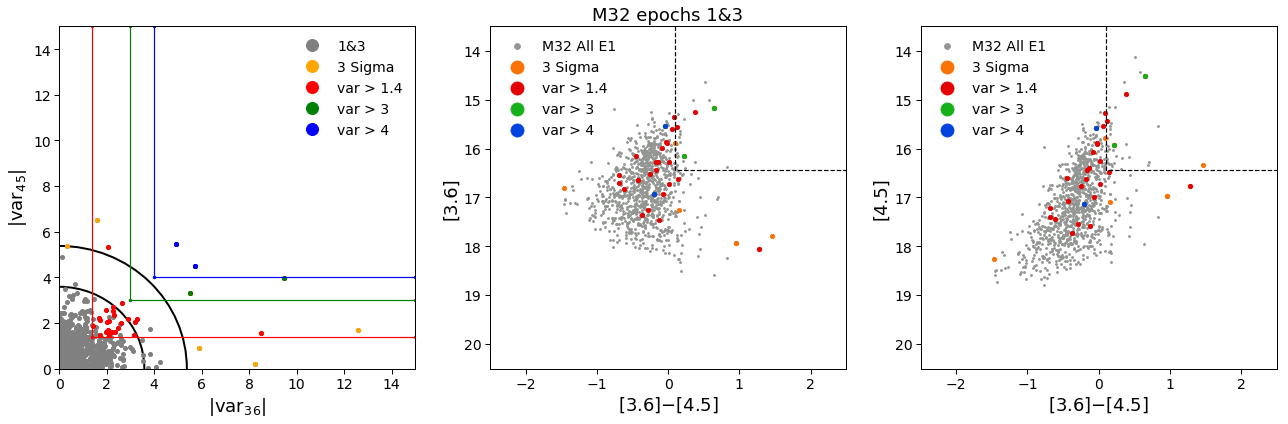

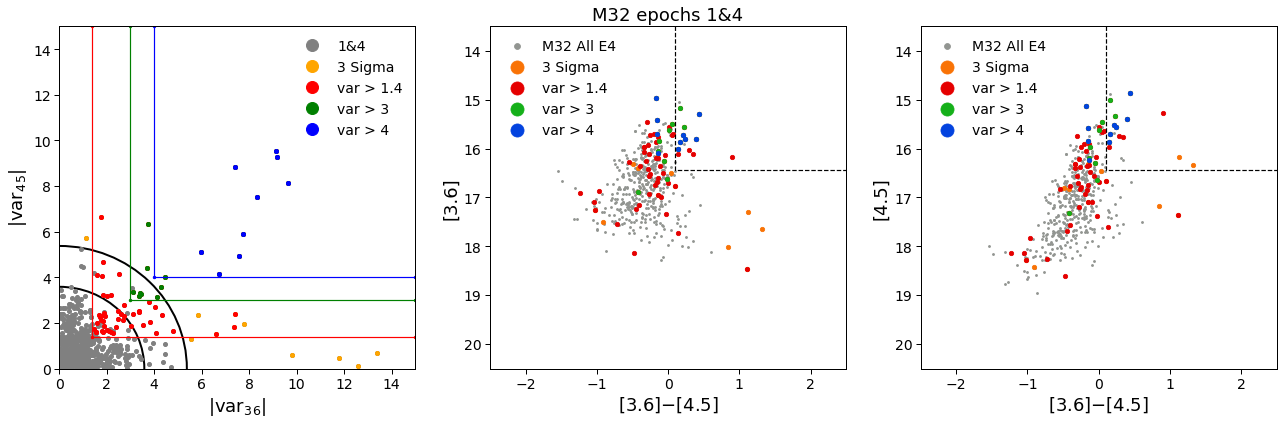

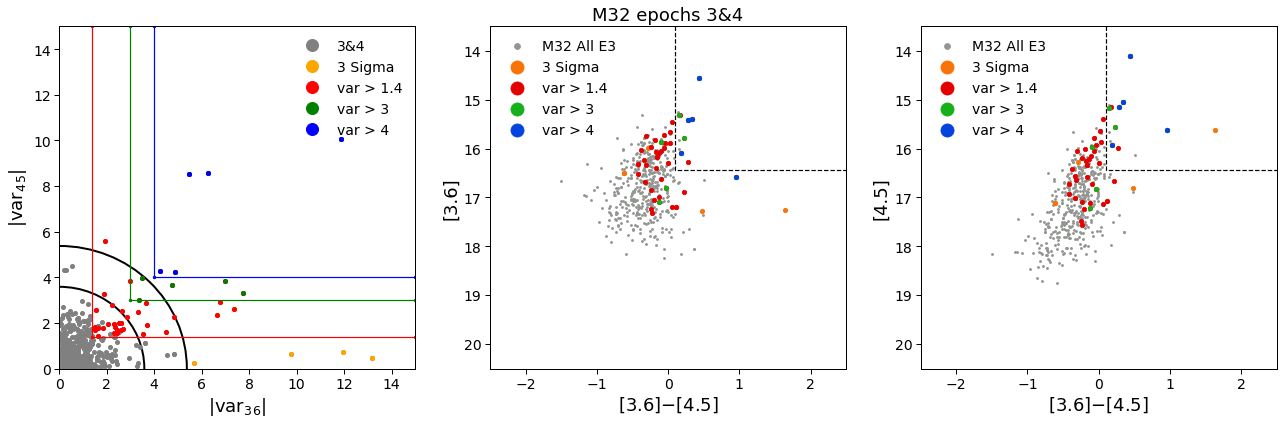

In [61]:
# This one is to isolate on v_36/v_45 graph and plot on CMD
def CMD(table,A,B,C,D,mag_index,var_idx,var_idx_2,var_idx_3,var_idx_4,sig_idx,xlabel,ylabel,xlim,ylim,epochs, epoch):
    plt.rc('font', family='sans-serif')
    plt.rc("xtick", labelsize=14)
    plt.rc("ytick", labelsize=14)
    plt.rc("axes", labelsize=14)
    plt.rc("legend", fontsize=14)
    # plt.rcdefaults()
    # Setting up figure
    #ax = plt.gca()
    plt.figure(figsize=(18,6))
    
    ax = plt.subplot(1,3,1)
    plt.plot(data[C][var_idx], data[D][var_idx], 'o', color='grey', ms=4, label=epochs)
    # Overplot variable sources
    plt.plot(data[C][sig_idx], data[D][sig_idx], 'o', color='orange', ms=4,label="3 Sigma")
    plt.plot(data[C][var_idx_2], data[D][var_idx_2], 'o', color='red', ms=4,label="var > 1.4")
    plt.plot(data[C][var_idx_3], data[D][var_idx_3], 'o', color='green', ms=4,label="var > 3")
    plt.plot(data[C][var_idx_4], data[D][var_idx_4], 'o', color='blue', ms=4,label="var > 4")
    plt.xlabel('|var$_3$$_6$|', size=18)
    plt.ylabel('|var$_4$$_5$|', size=18)
    plt.xlim(0,15)
    plt.ylim(0,15)
    plt.plot([1.4,1.4,15],[15,1.4,1.4],marker='.',color='red')
    plt.plot([3,3,15],[15,3,3],marker='.',color='green')
    plt.plot([4,4,15],[15,4,4],marker='.',color='blue')
    circle1 = plt.Circle((0, 0), 2*sig, color='black', clip_on=True, fill=False, lw=2)
    circle2 = plt.Circle((0, 0), 3*sig, color='black', clip_on=True, fill=False, lw=2)
    ax.add_artist(circle1)
    ax.add_artist(circle2)
    plt.legend(loc="upper right",frameon=False, scatterpoints=1, numpoints=1, markerscale=3.)
    
    plt.subplot(1,3,2)
    # Plot all sensible stars which satify the cut criteria
    plt.scatter(table[A][mag_index]-table[B][mag_index], table[A][mag_index], s=3.9,color=sns.xkcd_rgb['grey'], label="M32 All "+epoch)
    # Overplot variable sources
    plt.scatter(table[A][sig_idx]-table[B][sig_idx], table[A][sig_idx],s=19,color=sns.xkcd_rgb['orange'],label="3 Sigma")
    plt.scatter(table[A][var_idx_2]-table[B][var_idx_2], table[A][var_idx_2],s=19,color=sns.xkcd_rgb['red'],label="var > 1.4")
    plt.scatter(table[A][var_idx_3]-table[B][var_idx_3], table[A][var_idx_3],s=19,color=sns.xkcd_rgb['green'],label="var > 3")
    plt.scatter(table[A][var_idx_4]-table[B][var_idx_4], table[A][var_idx_4],s=19,color=sns.xkcd_rgb['blue'],label="var > 4")
    # Set the axis lables
    plt.xlabel(xlabel, fontsize=18)
    plt.ylabel(ylabel, fontsize=18)
    # Set limits if automatic values dont work well
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.plot([x,x,xlim[1]],[ylim[1],y,y],linestyle='dashed',color='black')
    # Add a legend
    plt.legend(loc="upper left",frameon=False, scatterpoints=1, numpoints=1, markerscale=3.)
    plt.title('M32 epochs '+epochs, fontsize=18)

    
    plt.subplot(1,3,3)
    # Plot all sensible stars which satify the cut criteria
    plt.scatter(table[A][mag_index]-table[B][mag_index], table[B][mag_index], s=3.9,color=sns.xkcd_rgb['grey'], label="M32 All "+epoch)
    # Overplot variable sources
    plt.scatter(table[A][sig_idx]-table[B][sig_idx], table[B][sig_idx],s=19,color=sns.xkcd_rgb['orange'],label="3 Sigma")
    plt.scatter(table[A][var_idx_2]-table[B][var_idx_2], table[B][var_idx_2],s=19,color=sns.xkcd_rgb['red'],label="var > 1.4")
    plt.scatter(table[A][var_idx_3]-table[B][var_idx_3], table[B][var_idx_3],s=19,color=sns.xkcd_rgb['green'],label="var > 3")
    plt.scatter(table[A][var_idx_4]-table[B][var_idx_4], table[B][var_idx_4],s=19,color=sns.xkcd_rgb['blue'],label="var > 4")
    # Set the axis lables
    plt.xlabel(xlabel, fontsize=18)
    plt.ylabel('[4.5]', fontsize=18)
    # Set limits if automatic values dont work well
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.plot([x,x,xlim[1]],[ylim[1],y,y],linestyle='dashed',color='black')

    # Add a legend
    plt.legend(loc="upper left",frameon=False, scatterpoints=1, numpoints=1, markerscale=3.)
    
    #plt.savefig("bla.pdf", bbox_inches='tight')    # Saves the figure is uncommented
    plt.tight_layout()
    plt.show()
    plt.close()

good_var_1_3_idx_2 = np.where(((data['var_36_1_3_abs']!=-99)&(data['var_45_1_3_abs']!=-99))&
                              (((data['var_36_1_3']<-1.4)&(data['var_45_1_3']<-1.4))|(data['var_36_1_3']>1.4)&(data['var_45_1_3']>1.4)))
good_var_1_3_idx_3 = np.where(((data['var_36_1_3_abs']!=-99)&(data['var_45_1_3_abs']!=-99))&
                              (((data['var_36_1_3']<-3)&(data['var_45_1_3']<-3))|(data['var_36_1_3']>3)&(data['var_45_1_3']>3)))
good_var_1_3_idx_4 = np.where(((data['var_36_1_3_abs']!=-99)&(data['var_45_1_3_abs']!=-99))&
                              (((data['var_36_1_3']<-4)&(data['var_45_1_3']<-4))|(data['var_36_1_3']>4)&(data['var_45_1_3']>4)))

good_var_1_4_idx_2 = np.where(((data['var_36_1_4_abs']!=-99)&(data['var_45_1_4_abs']!=-99))&
                              (((data['var_36_1_4']<-1.4)&(data['var_45_1_4']<-1.4))|(data['var_36_1_4']>1.4)&(data['var_45_1_4']>1.4)))
good_var_1_4_idx_3 = np.where(((data['var_36_1_4_abs']!=-99)&(data['var_45_1_4_abs']!=-99))&
                              (((data['var_36_1_4']<-3)&(data['var_45_1_4']<-3))|(data['var_36_1_4']>3)&(data['var_45_1_4']>3)))
good_var_1_4_idx_4 = np.where(((data['var_36_1_4_abs']!=-99)&(data['var_45_1_4_abs']!=-99))&
                              (((data['var_36_1_4']<-4)&(data['var_45_1_4']<-4))|(data['var_36_1_4']>4)&(data['var_45_1_4']>4)))

good_var_3_4_idx_2 = np.where(((data['var_36_3_4_abs']!=-99)&(data['var_45_3_4_abs']!=-99))&
                              (((data['var_36_3_4']<-1.4)&(data['var_45_3_4']<-1.4))|(data['var_36_3_4']>1.4)&(data['var_45_3_4']>1.4)))
good_var_3_4_idx_3 = np.where(((data['var_36_3_4_abs']!=-99)&(data['var_45_3_4_abs']!=-99))&
                              (((data['var_36_3_4']<-3)&(data['var_45_3_4']<-3))|(data['var_36_3_4']>3)&(data['var_45_3_4']>3)))
good_var_3_4_idx_4 = np.where(((data['var_36_3_4_abs']!=-99)&(data['var_45_3_4_abs']!=-99))&
                              (((data['var_36_3_4']<-4)&(data['var_45_3_4']<-4))|(data['var_36_3_4']>4)&(data['var_45_3_4']>4)))

# Flag these sources as variable in the relevant epochs
# NB currently saying variable if index greater than 2 but should take a good value from the variability histogram
data['variable_1_3'][good_var_1_3_idx_2]=1
data['variable_1_4'][good_var_1_4_idx_2]=1
data['variable_3_4'][good_var_3_4_idx_2]=1
print("No. variable in E1-E3: ",len(good_var_1_3_idx_2[0]))
print("No. variable in E1-E4: ",len(good_var_1_4_idx_2[0]))
print("No. variable in E3-E4: ",len(good_var_3_4_idx_2[0]))

# Find where variabilities are good in each pair of epochs
good_var_1_3_idx = np.where((data['var_36_1_3_abs']!=-99) & (data['var_45_1_3_abs']!=-99))
good_var_1_4_idx = np.where((data['var_36_1_4_abs']!=-99) & (data['var_45_1_4_abs']!=-99))
good_var_3_4_idx = np.where((data['var_36_3_4_abs']!=-99) & (data['var_45_3_4_abs']!=-99))

# Find 3 sigma points
three_sig_1_3 = np.where(((data['var_36_1_3']*data['var_36_1_3']+data['var_45_1_3']*data['var_45_1_3'])>9*sig**2)&
                        (data['var_36_1_3_abs']!=-99)&(data['var_45_1_3_abs']!=-99))
print(len(three_sig_1_3[0]))
three_sig_1_4 = np.where(((data['var_36_1_4']*data['var_36_1_4']+data['var_45_1_4']*data['var_45_1_4'])>9*sig**2)&
                        (data['var_36_1_4_abs']!=-99)&(data['var_45_1_4_abs']!=-99))
print(len(three_sig_1_4[0]))
three_sig_3_4 = np.where(((data['var_36_3_4']*data['var_36_3_4']+data['var_45_3_4']*data['var_45_3_4'])>9*sig**2)&
                        (data['var_36_3_4_abs']!=-99)&(data['var_45_3_4_abs']!=-99))
print(len(three_sig_3_4[0]))

# Note 2nd and 3rd parameters pertain to the CMD axes. These have been chosen to be one of the two epochs in question
CMD(data,'mag_36_1','mag_45_1','var_36_1_3_abs','var_45_1_3_abs',good_E1_idx,good_var_1_3_idx,good_var_1_3_idx_2,
    good_var_1_3_idx_3,good_var_1_3_idx_4,three_sig_1_3,'[3.6]$-$[4.5]','[3.6]',(-2.5,2.5),(20.5,13.5),'1&3','E1')
CMD(data,'mag_36_4','mag_45_4','var_36_1_4_abs','var_45_1_4_abs',good_E3_idx,good_var_1_4_idx,good_var_1_4_idx_2,
    good_var_1_4_idx_3,good_var_1_4_idx_4,three_sig_1_4,'[3.6]$-$[4.5]','[3.6]',(-2.5,2.5),(20.5,13.5),'1&4','E4')
CMD(data,'mag_36_3','mag_45_3','var_36_3_4_abs','var_45_3_4_abs',good_E4_idx,good_var_3_4_idx,good_var_3_4_idx_2,
    good_var_3_4_idx_3,good_var_3_4_idx_4,three_sig_3_4,'[3.6]$-$[4.5]','[3.6]',(-2.5,2.5),(20.5,13.5),'3&4','E3')

No. variable in E1-E3:  5
No. variable in E1-E4:  23
No. variable in E3-E4:  14
24
64
37


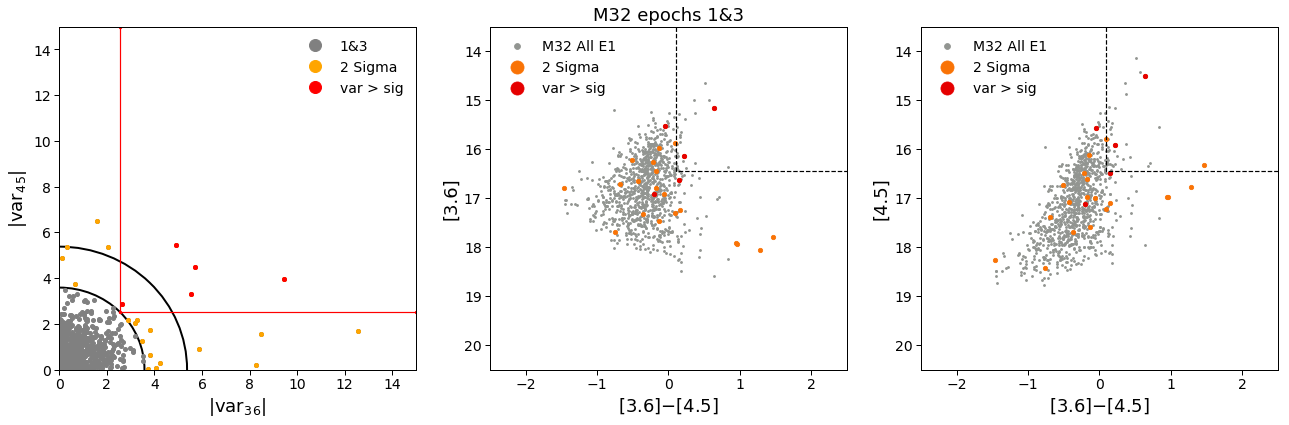

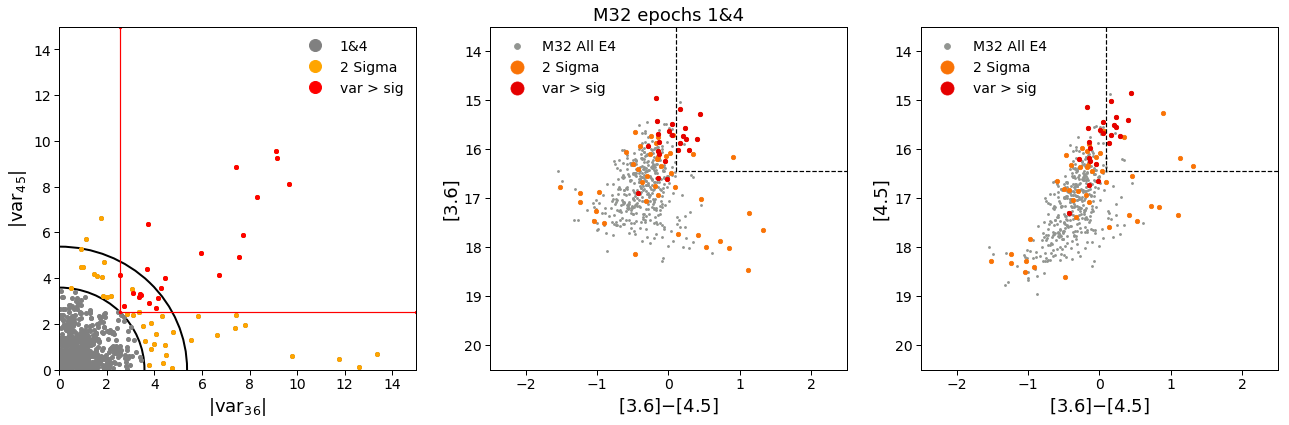

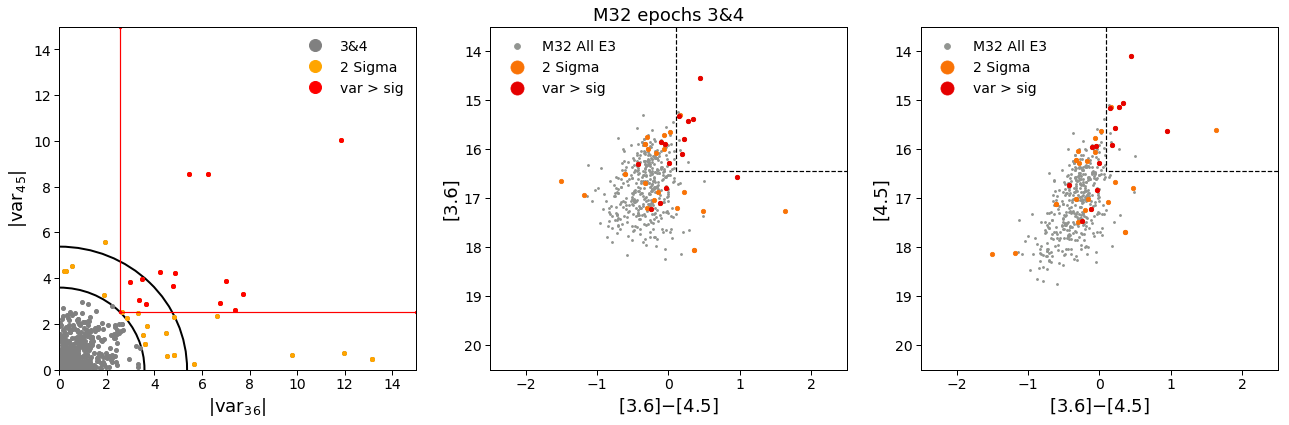

In [69]:
# This one is to isolate on v_36/v_45 graph and plot on CMD
def CMD(table,A,B,C,D,mag_index,var_idx,var_idx_2,sig_idx,xlabel,ylabel,xlim,ylim,epochs, epoch):
    plt.rc('font', family='sans-serif')
    plt.rc("xtick", labelsize=14)
    plt.rc("ytick", labelsize=14)
    plt.rc("axes", labelsize=14)
    plt.rc("legend", fontsize=14)
    # plt.rcdefaults()
    # Setting up figure
    #ax = plt.gca()
    plt.figure(figsize=(18,6))
    
    ax = plt.subplot(1,3,1)
    plt.plot(data[C][var_idx], data[D][var_idx], 'o', color='grey', ms=4, label=epochs)
    # Overplot variable sources
    plt.plot(data[C][sig_idx], data[D][sig_idx], 'o', color='orange', ms=4,label="2 Sigma")
    plt.plot(data[C][var_idx_2], data[D][var_idx_2], 'o', color='red', ms=4,label="var > sig")
    plt.xlabel('|var$_3$$_6$|', size=18)
    plt.ylabel('|var$_4$$_5$|', size=18)
    plt.xlim(0,15)
    plt.ylim(0,15)
    plt.plot([boxnum*sig,boxnum*sig,15],[15,boxnum*sig,boxnum*sig],marker='.',color='red')
    circle1 = plt.Circle((0, 0), 2*sig, color='black', clip_on=True, fill=False, lw=2)
    circle2 = plt.Circle((0, 0), 3*sig, color='black', clip_on=True, fill=False, lw=2)
    ax.add_artist(circle1)
    ax.add_artist(circle2)
    plt.legend(loc="upper right",frameon=False, scatterpoints=1, numpoints=1, markerscale=3.)
    
    plt.subplot(1,3,2)
    # Plot all sensible stars which satify the cut criteria
    plt.scatter(table[A][mag_index]-table[B][mag_index], table[A][mag_index], s=3.9,color=sns.xkcd_rgb['grey'], label="M32 All "+epoch)
    # Overplot variable sources
    plt.scatter(table[A][sig_idx]-table[B][sig_idx], table[A][sig_idx],s=19,color=sns.xkcd_rgb['orange'],label="2 Sigma")
    plt.scatter(table[A][var_idx_2]-table[B][var_idx_2], table[A][var_idx_2],s=19,color=sns.xkcd_rgb['red'],label="var > sig")
    # Set the axis lables
    plt.xlabel(xlabel, fontsize=18)
    plt.ylabel(ylabel, fontsize=18)
    # Set limits if automatic values dont work well
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.plot([x,x,xlim[1]],[ylim[1],y,y],linestyle='dashed',color='black')
    # Add a legend
    plt.legend(loc="upper left",frameon=False, scatterpoints=1, numpoints=1, markerscale=3.)
    plt.title('M32 epochs '+epochs, fontsize=18)

    
    plt.subplot(1,3,3)
    # Plot all sensible stars which satify the cut criteria
    plt.scatter(table[A][mag_index]-table[B][mag_index], table[B][mag_index], s=3.9,color=sns.xkcd_rgb['grey'], label="M32 All "+epoch)
    # Overplot variable sources
    plt.scatter(table[A][sig_idx]-table[B][sig_idx], table[B][sig_idx],s=19,color=sns.xkcd_rgb['orange'],label="2 Sigma")
    plt.scatter(table[A][var_idx_2]-table[B][var_idx_2], table[B][var_idx_2],s=19,color=sns.xkcd_rgb['red'],label="var > sig")
    # Set the axis lables
    plt.xlabel(xlabel, fontsize=18)
    plt.ylabel('[4.5]', fontsize=18)
    # Set limits if automatic values dont work well
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.plot([x,x,xlim[1]],[ylim[1],y,y],linestyle='dashed',color='black')

    # Add a legend
    plt.legend(loc="upper left",frameon=False, scatterpoints=1, numpoints=1, markerscale=3.)
    
    #plt.savefig("bla.pdf", bbox_inches='tight')    # Saves the figure is uncommented
    plt.tight_layout()
    plt.show()
    plt.close()

boxnum = math.sqrt(2)
    
good_var_1_3_idx_2 = np.where(((data['var_36_1_3_abs']!=-99)&(data['var_45_1_3_abs']!=-99))&
                              (((data['var_36_1_3']<-boxnum*sig)&(data['var_45_1_3']<-boxnum*sig))|(data['var_36_1_3']>boxnum*sig)&(data['var_45_1_3']>boxnum*sig)))

good_var_1_4_idx_2 = np.where(((data['var_36_1_4_abs']!=-99)&(data['var_45_1_4_abs']!=-99))&
                              (((data['var_36_1_4']<-boxnum*sig)&(data['var_45_1_4']<-boxnum*sig))|(data['var_36_1_4']>boxnum*sig)&(data['var_45_1_4']>boxnum*sig)))

good_var_3_4_idx_2 = np.where(((data['var_36_3_4_abs']!=-99)&(data['var_45_3_4_abs']!=-99))&
                              (((data['var_36_3_4']<-boxnum*sig)&(data['var_45_3_4']<-boxnum*sig))|(data['var_36_3_4']>boxnum*sig)&(data['var_45_3_4']>boxnum*sig)))

# Flag these sources as variable in the relevant epochs
# NB currently saying variable if index greater than 1.7912 = sigma average
data['variable_1_3'][good_var_1_3_idx_2]=1
data['variable_1_4'][good_var_1_4_idx_2]=1
data['variable_3_4'][good_var_3_4_idx_2]=1
print("No. variable in E1-E3: ",len(good_var_1_3_idx_2[0]))
print("No. variable in E1-E4: ",len(good_var_1_4_idx_2[0]))
print("No. variable in E3-E4: ",len(good_var_3_4_idx_2[0]))

# Find where variabilities are good in each pair of epochs
good_var_1_3_idx = np.where((data['var_36_1_3_abs']!=-99) & (data['var_45_1_3_abs']!=-99))
good_var_1_4_idx = np.where((data['var_36_1_4_abs']!=-99) & (data['var_45_1_4_abs']!=-99))
good_var_3_4_idx = np.where((data['var_36_3_4_abs']!=-99) & (data['var_45_3_4_abs']!=-99))

# Find 2 sigma points
two_sig_1_3 = np.where(((data['var_36_1_3']*data['var_36_1_3']+data['var_45_1_3']*data['var_45_1_3'])>4*sig**2)&
                        (data['var_36_1_3_abs']!=-99)&(data['var_45_1_3_abs']!=-99))
print(len(two_sig_1_3[0]))
two_sig_1_4 = np.where(((data['var_36_1_4']*data['var_36_1_4']+data['var_45_1_4']*data['var_45_1_4'])>4*sig**2)&
                        (data['var_36_1_4_abs']!=-99)&(data['var_45_1_4_abs']!=-99))
print(len(two_sig_1_4[0]))
two_sig_3_4 = np.where(((data['var_36_3_4']*data['var_36_3_4']+data['var_45_3_4']*data['var_45_3_4'])>4*sig**2)&
                        (data['var_36_3_4_abs']!=-99)&(data['var_45_3_4_abs']!=-99))
print(len(two_sig_3_4[0]))

# Note 2nd and 3rd parameters pertain to the CMD axes. These have been chosen to be one of the two epochs in question
CMD(data,'mag_36_1','mag_45_1','var_36_1_3_abs','var_45_1_3_abs',good_E1_idx,good_var_1_3_idx,good_var_1_3_idx_2,
    two_sig_1_3,'[3.6]$-$[4.5]','[3.6]',(-2.5,2.5),(20.5,13.5),'1&3','E1')
CMD(data,'mag_36_4','mag_45_4','var_36_1_4_abs','var_45_1_4_abs',good_E3_idx,good_var_1_4_idx,good_var_1_4_idx_2,
    two_sig_1_4,'[3.6]$-$[4.5]','[3.6]',(-2.5,2.5),(20.5,13.5),'1&4','E4')
CMD(data,'mag_36_3','mag_45_3','var_36_3_4_abs','var_45_3_4_abs',good_E4_idx,good_var_3_4_idx,good_var_3_4_idx_2,
    two_sig_3_4,'[3.6]$-$[4.5]','[3.6]',(-2.5,2.5),(20.5,13.5),'3&4','E3')

# Colour-selected evolved stars

No. evolved in E1:  25
No. evolved in E3:  16
No. evolved in E4:  18


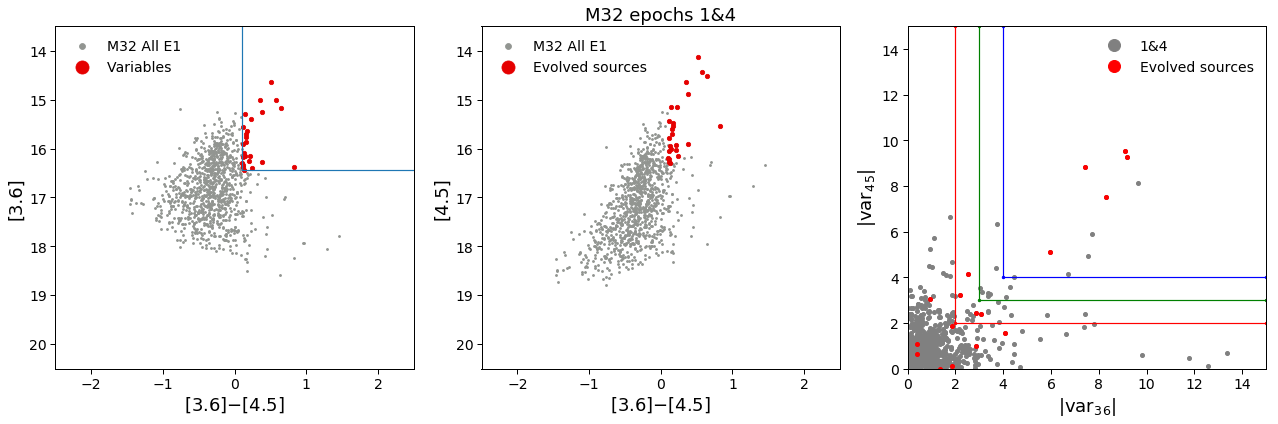

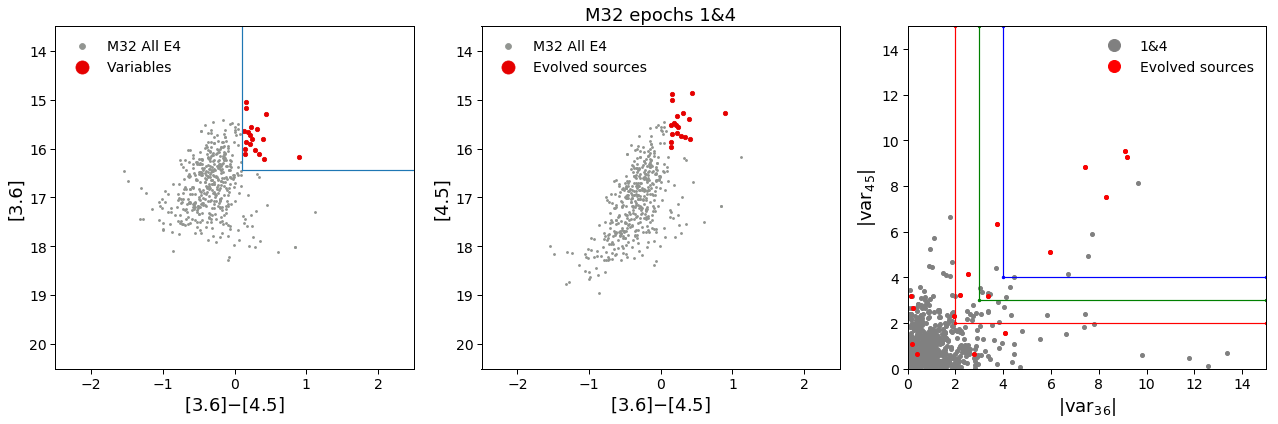

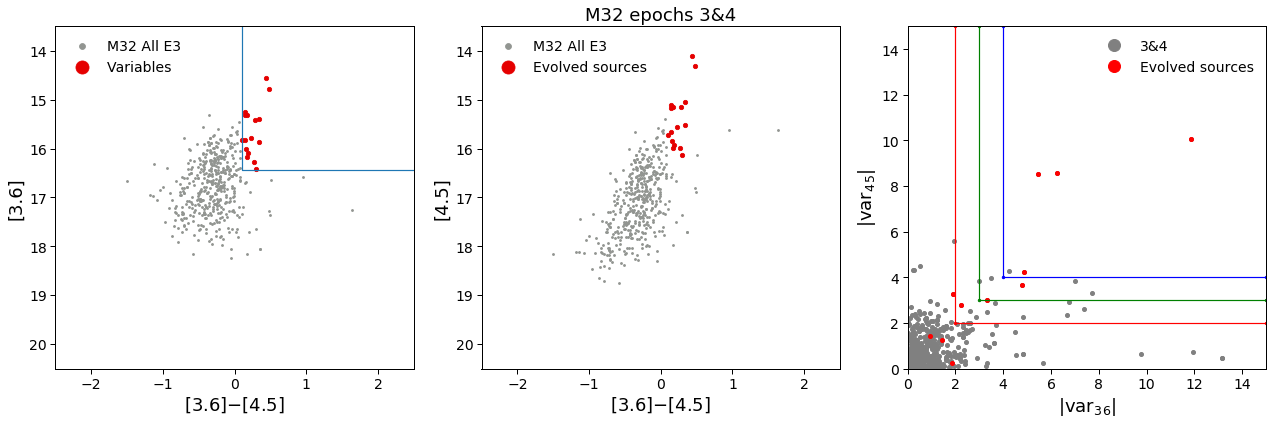

In [31]:
# This one is to isolate on v_36/v_45 graph and plot on CMD


def CMD_back(table,A,B,C,D,var_idx,mag_index,good_var_idx,xlabel,ylabel,xlim,ylim,epochs, epoch):
    plt.rc('font', family='sans-serif')
    plt.rc("xtick", labelsize=14)
    plt.rc("ytick", labelsize=14)
    plt.rc("axes", labelsize=14)
    plt.rc("legend", fontsize=14)
    # plt.rcdefaults()
    # Setting up figure
    #ax = plt.gca()
    plt.figure(figsize=(18,6))
    
    plt.subplot(1,3,1)
    # Plot all sensible stars which satify the cut criteria
    plt.scatter(table[A][mag_index]-table[B][mag_index], table[A][mag_index], s=3.9,color=sns.xkcd_rgb['grey'], label="M32 All "+epoch)
    # Overplot variable sources
    plt.scatter(table[A][var_idx]-table[B][var_idx], table[A][var_idx],s=19,color=sns.xkcd_rgb['red'],label="Variables")
    # Set the axis lables
    plt.xlabel(xlabel, fontsize=18)
    plt.ylabel(ylabel, fontsize=18)
    # Set limits if automatic values dont work well
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.plot([x,x,xlim[1]],[ylim[1],y,y])
    # Add a legend
    plt.legend(loc="upper left",frameon=False, scatterpoints=1, numpoints=1, markerscale=3.)
    
    plt.subplot(1,3,2)
    # Plot all sensible stars which satify the cut criteria
    plt.scatter(table[A][mag_index]-table[B][mag_index], table[B][mag_index], s=3.9,color=sns.xkcd_rgb['grey'], label="M32 All "+epoch)
    # Overplot variable sources
    plt.scatter(table[A][var_idx]-table[B][var_idx], table[B][var_idx],s=19,color=sns.xkcd_rgb['red'],label="Evolved sources")
    # Set the axis lables
    plt.xlabel(xlabel, fontsize=18)
    plt.ylabel('[4.5]', fontsize=18)
    # Set limits if automatic values dont work well
    plt.xlim(xlim)
    plt.ylim(ylim)
    # Add a legend
    plt.title('M32 epochs '+epochs, fontsize=18)
    plt.legend(loc="upper left",frameon=False, scatterpoints=1, numpoints=1, markerscale=3.)
    
    plt.subplot(1,3,3)
    plt.plot(data[C][good_var_idx], data[D][good_var_idx], 'o', color='grey', ms=4, label=epochs)
    # Overplot variable sources
    plt.plot(data[C][var_idx], data[D][var_idx], 'o', color='red', ms=4,label="Evolved sources")
    plt.xlabel('|var$_3$$_6$|', size=18)
    plt.ylabel('|var$_4$$_5$|', size=18)
    plt.xlim(0,15)
    plt.ylim(0,15)
    plt.plot([2,2,15],[15,2,2],marker='.',color='red')
    plt.plot([3,3,15],[15,3,3],marker='.',color='green')
    plt.plot([4,4,15],[15,4,4],marker='.',color='blue')
    plt.legend(loc="upper right",frameon=False, scatterpoints=1, numpoints=1, markerscale=3.)
    
    #plt.savefig("bla.pdf", bbox_inches='tight')    # Saves the figure is uncommented
    plt.tight_layout()
    plt.show()
    plt.close()

# Select using colour and 36 mag
var_1_idx=np.where((data['mag_36_1']-data['mag_45_1']>x)&(data['mag_36_1']<y)&
                  (data['mag_36_1']!=-99)&(data['mag_45_1']!=-99))
var_3_idx=np.where((data['mag_36_3']-data['mag_45_3']>x)&(data['mag_36_3']<y)&
                  (data['mag_36_3']!=-99)&(data['mag_45_3']!=-99))
var_4_idx=np.where((data['mag_36_4']-data['mag_45_4']>x)&(data['mag_36_4']<y)&
                  (data['mag_36_4']!=-99)&(data['mag_45_4']!=-99))

# Flag these sources as evolved in the relevant epoch
data['evolved_1'][var_1_idx]=1
data['evolved_3'][var_3_idx]=1
data['evolved_4'][var_4_idx]=1
print("No. evolved in E1: ",len(var_1_idx[0]))
print("No. evolved in E3: ",len(var_3_idx[0]))
print("No. evolved in E4: ",len(var_4_idx[0]))


good_var_1_3_idx = np.where((data['var_36_1_3_abs']!=-99) & (data['var_45_1_3_abs']!=-99))
good_var_1_4_idx = np.where((data['var_36_1_4_abs']!=-99) & (data['var_45_1_4_abs']!=-99))
good_var_3_4_idx = np.where((data['var_36_3_4_abs']!=-99) & (data['var_45_3_4_abs']!=-99))

# Note 2nd and 3rd parameters pertain to the CMD axes. These have been chosen to be one of the two epochs in question
CMD_back(data,'mag_36_1','mag_45_1','var_36_1_4_abs','var_45_1_4_abs',var_1_idx,good_E1_idx,good_var_1_4_idx,
         '[3.6]$-$[4.5]','[3.6]',(-2.5,2.5),(20.5,13.5),'1&4','E1')
CMD_back(data,'mag_36_4','mag_45_4','var_36_1_4_abs','var_45_1_4_abs',var_4_idx,good_E3_idx,good_var_1_4_idx,
         '[3.6]$-$[4.5]','[3.6]',(-2.5,2.5),(20.5,13.5),'1&4','E4')
CMD_back(data,'mag_36_3','mag_45_3','var_36_3_4_abs','var_45_3_4_abs',var_3_idx,good_E4_idx,good_var_3_4_idx,
         '[3.6]$-$[4.5]','[3.6]',(-2.5,2.5),(20.5,13.5),'3&4','E3')

In [33]:
# Write out file which now contains evolved and variable source flags
ascii.write(data,'good_data_flagged.csv',format='csv',overwrite=True)

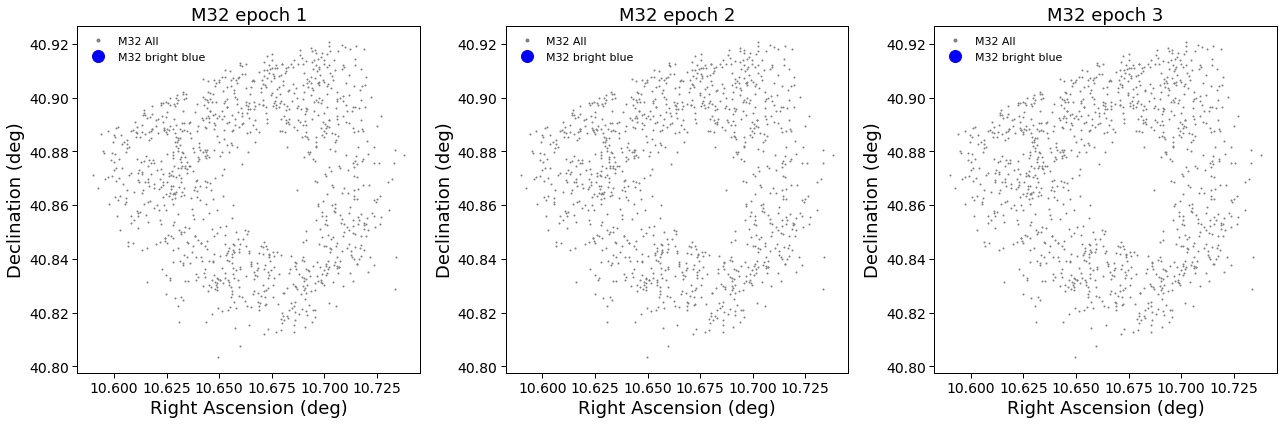

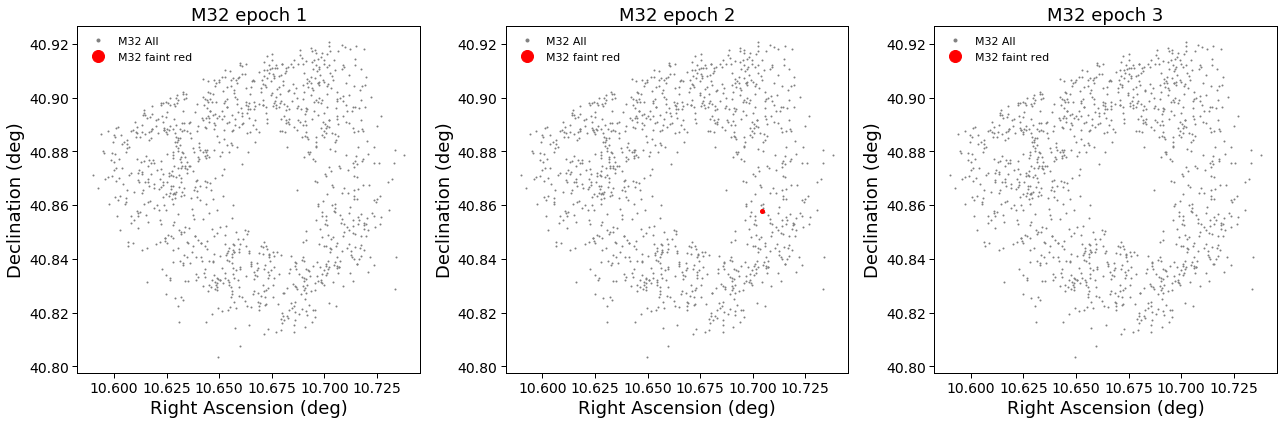

In [13]:
# Plot sources with a high or low colour. These graphs apply to both [3.6] and [4.5].

# Define function to produce location plot
def loc_plot_simple(idx1,idx3,idx4,description,colour):
    # Setting up figure
    plt.rc('font', family='sans-serif')
    plt.rc("xtick", labelsize=14)
    plt.rc("ytick", labelsize=14)
    plt.rc("axes", labelsize=14)
    plt.rc("legend", fontsize=11)
    plt.figure(figsize=(18,6))
    ax = plt.gca()                        # Sets up active plot region
    
    # Make the actual plot
    plt.subplot(1,3,1)
    plt.plot(data['RA'], data['Dec'], '.', color='grey', ms=2, label="M32 All")
    plt.plot(data['RA'][idx1], data['Dec'][idx1], 'o', color=colour, ms=4, label="M32 "+description)    
    plt.xlabel('Right Ascension (deg)', size=18)
    plt.ylabel('Declination (deg)', size=18)
    plt.legend(loc="upper left",frameon=False, scatterpoints=1, numpoints=1, markerscale=3.)
    plt.title('M32 epoch 1',fontsize=18)
    
    plt.subplot(1,3,2)
    plt.plot(data['RA'], data['Dec'], '.', color='grey', ms=2, label="M32 All")
    plt.plot(data['RA'][idx3], data['Dec'][idx3], 'o', color=colour, ms=4, label="M32 "+description)    
    plt.xlabel('Right Ascension (deg)', size=18)
    plt.ylabel('Declination (deg)', size=18)
    plt.legend(loc="upper left",frameon=False, scatterpoints=1, numpoints=1, markerscale=3.)
    plt.title('M32 epoch 2',fontsize=18)
    
    plt.subplot(1,3,3)
    plt.plot(data['RA'], data['Dec'], '.', color='grey', ms=2, label="M32 All")
    plt.plot(data['RA'][idx4], data['Dec'][idx4], 'o', color=colour, ms=4, label="M32 "+description)    
    plt.xlabel('Right Ascension (deg)', size=18)
    plt.ylabel('Declination (deg)', size=18)
    plt.legend(loc="upper left",frameon=False, scatterpoints=1, numpoints=1, markerscale=3.)
    plt.title('M32 epoch 3',fontsize=18)
    
    #plt.savefig("blah.pdf", bbox_inches='tight')
    plt.tight_layout()
    plt.show()
    plt.close()
    
loc_plot_simple(bright_blue_1_idx,bright_blue_3_idx,bright_blue_4_idx,'bright blue','blue')
loc_plot_simple(faint_red_1_idx,faint_red_3_idx,faint_red_4_idx,'faint red','red')

In [67]:
print(data.colnames)

['ID', 'RA', 'Dec', 'total_associations', 'ID_36_1', 'RA_36_1', 'Dec_36_1', 'mag_36_1', 'mag_err_36_1', 'ID_36_3', 'RA_36_3', 'Dec_36_3', 'mag_36_3', 'mag_err_36_3', 'sep_36_1_3', 'p_any_36_1_3', 'p_i_36_1_3', 'ID_36_4', 'RA_36_4', 'Dec_36_4', 'mag_36_4', 'mag_err_36_4', 'sep_36_1&3_4', 'p_any_36_1&3_4', 'p_i_36_1&3_4', '36_associations', 'ID_45_1', 'RA_45_1', 'Dec_45_1', 'mag_45_1', 'mag_err_45_1', 'ID_45_3', 'RA_45_3', 'Dec_45_3', 'mag_45_3', 'mag_err_45_3', 'sep_45_1_3', 'p_any_45_1_3', 'p_i_45_1_3', 'ID_45_4', 'RA_45_4', 'Dec_45_4', 'mag_45_4', 'mag_err_45_4', 'sep_45_1&3_4', 'p_any_45_1&3_4', 'p_i_45_1&3_4', '45_associations', 'sep_mean_36_mean_45', 'p_any_36_45', 'p_i_36_45']


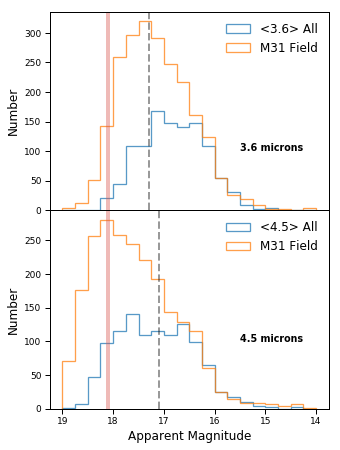

In [153]:
def set_pub():
    """
    Set up some great plot perameters
    """
    plt.rc('font', family='sans-serif')
    #plt.rc("text",  usetex=True)         # Allows latex commands
    plt.rc("xtick", labelsize=11)
    plt.rc("ytick", labelsize=11)
    plt.rc("axes", labelsize=10)
    plt.rc("legend", fontsize=10)
    plt.rc('savefig', dpi=400)           # Higher res outputs for journals
    # plt.rcdefaults()                   # Resets the parameters to their default values

    # For single column figures:
    width = 3.8
    height = width / 1.7

set_pub()


# Setting up plotting sizes

# plt.rc("text",  usetex=True)         # Allows latex commands
plt.rc('font', family='sans-serif')
plt.rc("xtick", labelsize=9)
plt.rc("ytick", labelsize=9)
plt.rc("axes", labelsize=9)
plt.rc("legend", fontsize=12)
# plt.rcdefaults()                    # Resets the parameters to their default values



# Setting up figure
#fig = plt.figure(figsize=(8, 8))
#fig = plt.figure()
fig, (ax1, ax2) = plt.subplots(ncols=1, nrows=2, sharex=True, figsize=(5, 10/1.37))
#ax0 = plt.gca()  # Sets up active plot region

# Remove horizontal space between axes
fig.subplots_adjust(hspace=0)

# Read in background data to overplot
bgd_file = 'good_bgd_data.csv'
bgd_data = ascii.read(bgd_file, data_start=1)

############################################################################################################
# Plot a ladder luminosity function of just the core region

# Set up the bin spacing
bw = stats.knuth_bin_width(data['mean_mag_36'])  # Determinal optimal bin size
#bins = np.linspace(12, 20, 31)  # Bin start, end, number +1
bins = np.linspace(14, 19, 21)  # Bin start, end, number +1
############################################################################################################


n, edg, patches = ax1.hist(data['mean_mag_36'], bins,  # facecolor='g', edgecolor='b',
                          lw=1.3, alpha=1.75, histtype='step', label="<3.6> All", ls="solid")
n, edg, patches = ax1.hist(bgd_data['mag_36_0'], bins,  # facecolor='g', edgecolor='b',
                          lw=1.3, alpha=1.75, histtype='step', label="M31 Field", ls="solid")

#n, edg, patches = ax1.hist(colddata['[3.6]'], bins,  # facecolor='g', edgecolor='b',
#                          lw=1.3, alpha=1.75, histtype='step', label="E0 [3.6]", ls="solid")

#ax1.set_xlabel("Apparent Magnitude", fontsize=12)
ax1.set_ylabel("Number", fontsize=12)

#ax1.set_ylim(0,170)

#Add 80% Completness limit
ax1.axvline(x=17.3, color=sns.xkcd_rgb["black"], linestyle='--', alpha=0.4, linewidth=2)

#Add TRGB
ax1.axvline(x=-6.3+24.4, color=sns.xkcd_rgb["pale red"], linestyle='-', alpha=0.4, linewidth=4)

#Set legend
ax1.legend(loc=0, frameon=False, scatterpoints=1, numpoints=1, markerscale=9.)

# Add wavlength to the panel
ax1.annotate("3.6 microns", [15.5, 100], horizontalalignment='left', size='medium', color='black',weight='bold')




n, edg, patches = ax2.hist(data['mean_mag_45'], bins,  # facecolor='g', edgecolor='b',
                          lw=1.3, alpha=1.75, histtype='step', label="<4.5> All", ls="solid")
n, edg, patches = ax2.hist(bgd_data['mag_45_0'], bins,  # facecolor='g', edgecolor='b',
                          lw=1.3, alpha=1.75, histtype='step', label="M31 Field", ls="solid")

#n, edg, patches = ax2.hist(colddata['[4.5]'], bins,  # facecolor='g', edgecolor='b',
#                         lw=1.3, alpha=1.75, histtype='step', label="E0 [4.5]", ls="solid")

ax2.set_xlabel("Apparent Magnitude", fontsize=12)
ax2.set_ylabel("Number", fontsize=12)
#ax2.set_ylim(0,169)

#Add 80% Completness limit
ax2.axvline(x=17.1, color=sns.xkcd_rgb["black"], linestyle='--', alpha=0.4, linewidth=2)

#Add TRGB
ax2.axvline(x=-6.3+24.4, color=sns.xkcd_rgb["pale red"], linestyle='-', alpha=0.4, linewidth=4)

#Set legend
ax2.legend(loc=0, frameon=False, scatterpoints=1, numpoints=1, markerscale=9.)

# Add wavlength to the panel
ax2.annotate("4.5 microns", [15.5, 100], horizontalalignment='left', size='medium', color='black',weight='bold')


plt.gca().invert_xaxis()    # flip the x-axis

#plt.savefig("bla.pdf", bbox_inches='tight')
#plt.tight_layout()
plt.show()
plt.close()


In [18]:
print(np.max(data['mean_mag_36']-data['mean_mag_45']))
print(np.min(data['mean_mag_36']-data['mean_mag_45']))

1.733452670000002
-2.36854733


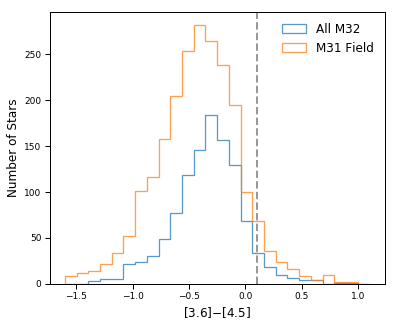

In [154]:
# Setting up plotting sizes

# plt.rc("text",  usetex=True)         # Allows latex commands
plt.rc('font', family='sans-serif')
plt.rc("xtick", labelsize=9)
plt.rc("ytick", labelsize=9)
plt.rc("axes", labelsize=9)
plt.rc("legend", fontsize=12)
# plt.rcdefaults()                    # Resets the parameters to their default values



# Setting up figure
fig = plt.figure(figsize=(6, 5))
ax1 = plt.gca()  # Sets up active plot region

############################################################################################################
# Plot a ladder luminosity function of just the core region

# Set up the bin spacing
bw = stats.knuth_bin_width(data['mean_mag_36']-data['mean_mag_45'])  # Determinal optimal bin size
bins = np.linspace(-1.6, 1.1, 27)  # Bin start, end, number +1
#bins = np.linspace(12, 20, 41)  # Bin start, end, number +1
############################################################################################################


n, edg, patches = ax1.hist(data['mean_mag_36']-data['mean_mag_45'], bins,  # facecolor='g', edgecolor='b',
                          lw=1.3, alpha=1.75, histtype='step', label="All M32", ls="solid")
n, edg, patches = ax1.hist(bgd_data['mag_36_0']-bgd_data['mag_45_0'], bins,  # facecolor='g', edgecolor='b',
                          lw=1.3, alpha=1.75, histtype='step', label="M31 Field", ls="solid")

#n, edg, patches = ax1.hist(colddata['[3.6]'], bins,  # facecolor='g', edgecolor='b',
#                          lw=1.3, alpha=1.75, histtype='step', label="E0 [3.6]", ls="solid")

ax1.set_xlabel('[3.6]$-$[4.5]', fontsize=12)
ax1.set_ylabel("Number of Stars", fontsize=12)

#Add 80% Completness limit
ax1.axvline(x=0.1, color=sns.xkcd_rgb["black"], linestyle='--', alpha=0.4, linewidth=2)

#Set legend
ax1.legend(loc=0, frameon=False, scatterpoints=1, numpoints=1, markerscale=9.)

#plt.savefig("bla.pdf", bbox_inches='tight')
#plt.tight_layout()
plt.show()
plt.close()


# NB cell below has data replaced with prob_data

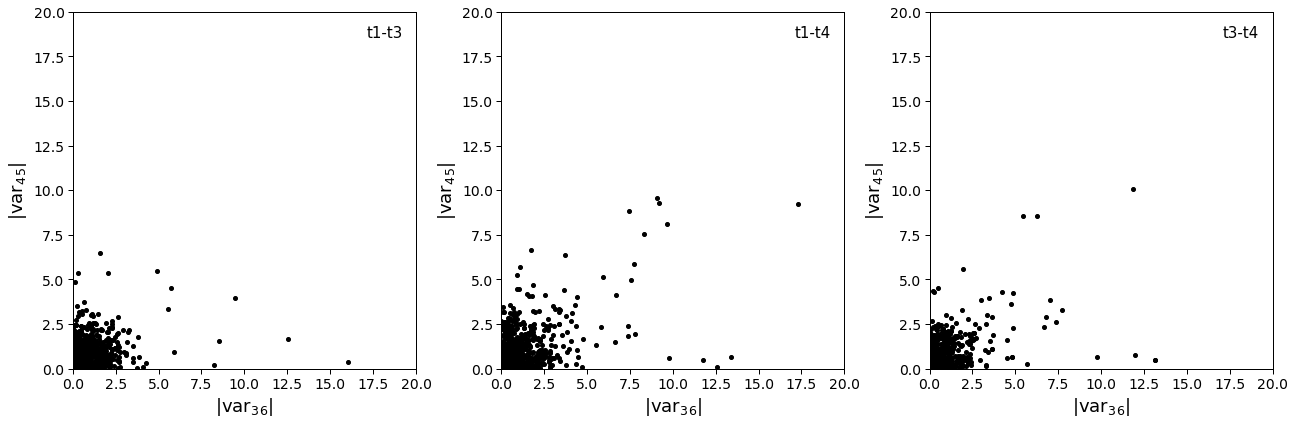

In [55]:
good_var_1_3_idx = np.where((data['var_36_1_3']!=-99) & (data['var_45_1_3']!=-99))
good_var_1_4_idx = np.where((data['var_36_1_4']!=-99) & (data['var_45_1_4']!=-99))
good_var_3_4_idx = np.where((data['var_36_3_4']!=-99) & (data['var_45_3_4']!=-99))

# Setting up figure
plt.rc('font', family='sans-serif')
plt.rc("xtick", labelsize=14)
plt.rc("ytick", labelsize=14)
plt.rc("axes", labelsize=14)
plt.rc("legend", fontsize=15)
plt.figure(figsize=(18,6))
ax = plt.gca()                        # Sets up active plot region

# Make the actual plot
plt.subplot(1,3,1)
plt.plot(data['var_36_1_3_abs'][good_var_1_3_idx], data['var_45_1_3_abs'][good_var_1_3_idx], 'o', color='black', ms=4, label="t1-t3")
plt.xlabel('|var$_3$$_6$|', size=18)
plt.ylabel('|var$_4$$_5$|', size=18)
plt.legend(loc="upper right",frameon=False, scatterpoints=1, numpoints=1, markerscale=0.)
#plt.title('M32 epochs 1 & 3',fontsize=18)
plt.xlim(0,20)
plt.ylim(0,20)

plt.subplot(1,3,2)
plt.plot(data['var_36_1_4_abs'][good_var_1_4_idx], data['var_45_1_4_abs'][good_var_1_4_idx], 'o', color='black', ms=4, label="t1-t4")
plt.xlabel('|var$_3$$_6$|', size=18)
plt.ylabel('|var$_4$$_5$|', size=18)
plt.legend(loc="upper right",frameon=False, scatterpoints=1, numpoints=1, markerscale=0.)
#plt.title('M32 epochs 1 & 4',fontsize=18)
plt.xlim(0,20)
plt.ylim(0,20)

plt.subplot(1,3,3)
plt.plot(data['var_36_3_4_abs'][good_var_3_4_idx], data['var_45_3_4_abs'][good_var_3_4_idx], 'o', color='black', ms=4, label="t3-t4")
plt.xlabel('|var$_3$$_6$|', size=18)
plt.ylabel('|var$_4$$_5$|', size=18)
plt.legend(loc="upper right",frameon=False, scatterpoints=1, numpoints=1, markerscale=0.)
#plt.title('M32 epochs 3 & 4',fontsize=18)
plt.xlim(0,20)
plt.ylim(0,20)

#bbb = sns.jointplot(data['var_36_1_3'][good_var_1_3_idx], data['var_45_1_3'][good_var_1_3_idx], kind="scatter")

#plt.savefig("blah.pdf", bbox_inches='tight')
plt.tight_layout()
plt.show()
plt.close()

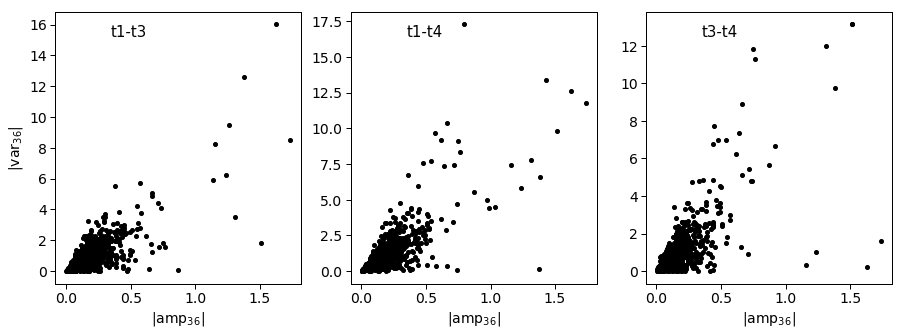

In [72]:
amp_var_36_1_3_idx = np.where((data['amp_36']!=-99) & (data['var_36_1_3']!=-99))
amp_var_36_1_4_idx = np.where((data['amp_36']!=-99) & (data['var_36_1_4']!=-99))
amp_var_36_3_4_idx = np.where((data['amp_36']!=-99) & (data['var_36_3_4']!=-99))

# Setting up figure
plt.rc('font', family='sans-serif')
plt.rc("xtick", labelsize=14)
plt.rc("ytick", labelsize=14)
plt.rc("axes", labelsize=14)
plt.rc("legend", fontsize=15)
plt.figure(figsize=(15,5))
ax = plt.gca()                        # Sets up active plot region

# Make the actual plot
plt.subplot(1,3,1)
plt.plot(data['amp_36'][amp_var_36_1_3_idx], data['var_36_1_3_abs'][amp_var_36_1_3_idx], 'o', color='black', ms=4, label="t1-t3")
plt.xlabel('|amp$_3$$_6$|', size=14)
plt.ylabel('|var$_3$$_6$|', size=14)
plt.legend(loc="upper left",frameon=False, scatterpoints=1, numpoints=1, markerscale=0.)

plt.subplot(1,3,2)
plt.plot(data['amp_36'][amp_var_36_1_4_idx], data['var_36_1_4_abs'][amp_var_36_1_4_idx], 'o', color='black', ms=4, label="t1-t4")
plt.xlabel('|amp$_3$$_6$|', size=14)
#plt.ylabel('|var$_3$$_6$|', size=14)
plt.legend(loc="upper left",frameon=False, scatterpoints=1, numpoints=1, markerscale=0.)

plt.subplot(1,3,3)
plt.plot(data['amp_36'][amp_var_36_3_4_idx], data['var_36_3_4_abs'][amp_var_36_3_4_idx], 'o', color='black', ms=4, label="t3-t4")
plt.xlabel('|amp$_3$$_6$|', size=14)
#plt.ylabel('|var$_3$$_6$|', size=14)
plt.legend(loc="upper left",frameon=False, scatterpoints=1, numpoints=1, markerscale=0.)

In [56]:
idx_good_var_36_1_3 = np.where(data['var_36_1_3']!=9999)
def graph(index,col):
    # Setting up figure
    plt.rc('font', family='sans-serif')
    plt.rc("xtick", labelsize=14)
    plt.rc("ytick", labelsize=14)
    plt.rc("axes", labelsize=14)
    plt.rc("legend", fontsize=15)
    plt.figure(figsize=(6,6))
    ax = plt.gca()                        # Sets up active plot region

    # Make the actual plot
    #plt.subplot(1,3,1)
    plt.plot(data['var_36_1_3'][index], data[col][index], 'o', color='black', ms=4)
    plt.xlabel('var_36_1_3', size=18)
    plt.ylabel(col, size=18)
    #plt.legend(loc="upper right",frameon=False, scatterpoints=1, numpoints=1, markerscale=0.)
    plt.title('M32'+col,fontsize=18)
    
'''print(len(data.colnames))
for i in range(len(data.colnames)):
    col_name = data.colnames[i]
    idx_good = np.where((data[col_name]!=9999) & (data['var_36_1_3']!=9999))
    graph(idx_good,col_name)'''

"print(len(data.colnames))\nfor i in range(len(data.colnames)):\n    col_name = data.colnames[i]\n    idx_good = np.where((data[col_name]!=9999) & (data['var_36_1_3']!=9999))\n    graph(idx_good,col_name)"